# Assignment 2: C6, Marriott Rooms Forecasting
Description 1: Examine the autocorrelation structure of asset returns of your database and create a forecast model with appropriate evaluation metrics. You need to show some learning for concepts such as parameter stability and the concept in Chapter 6. Do not overlap the datasets with each other 
<br>
Description 2: What forecasting procedure would you recommend for making the Tuesday afternoon forecast of each day’s demand for the following Saturday through Friday? 
What is your forecast for Saturday? 
What will you do about the current request for up to 60 rooms for Saturday?

# Covered Processes:
## Line Graphs, Dickey-Fuller Test, ACF & PACF plots, AIC & BIC, ARIMA, Invertibility Check, ARIMA Forecast, Exponential Smoothing, RMSE

In [9]:
import pandas as pd
import statsmodels.tsa.api as smt  # Import the statsmodels.tsa.api library
import pickle  # Import the pickle library

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

# Select the first two columns, assuming 'date' and '700' are column names
data = data[['date', 'tencent']]

# Calculate the percentage change for the '700' column and store it in 'dhp'
data['dhp'] = data['tencent'].transform(lambda x: (x - x.shift(1)) / x.shift(1) * 100)

# Remove rows with missing values
data = data.dropna()

# Display the first few rows of the resulting DataFrame
print(data.head())

        date  tencent       dhp
1 2021-04-11   31.891 -0.941169
2 2021-04-18   31.917  0.081528
3 2021-04-25   32.185  0.839678
4 2021-05-02   31.709 -1.478950
5 2021-05-09   32.107  1.255164


In [11]:
with open(file_path + 'mscibic.pickle', 'wb') as handle:
    pickle.dump(data, handle)

In [12]:
acf,q,pval = smt.acf(data['dhp'],nlags=12,qstat=True)
pacf = smt.pacf(data['dhp'],nlags=12)

correlogram = pd.DataFrame({'acf':acf[1:],
                            'pacf':pacf[1:],
                            'Q':q,
                            'p-val':pval})
correlogram

,acf,pacf,Q,p-val
0,0.128386,0.129474,2.011328,0.156129
1,-0.152653,-0.174958,4.879172,0.087197
2,-0.105275,-0.064761,6.254887,0.099847
3,-0.060085,-0.067660,6.706915,0.152211
4,-0.096906,-0.118045,7.893045,0.162229
5,-0.022517,-0.024709,7.957649,0.241223
6,-0.000080,-0.044321,7.957649,0.336343
7,0.112324,0.100715,9.594280,0.294664
8,-0.088562,-0.160245,10.620960,0.302587
9,0.004292,0.064211,10.623393,0.387601


In [13]:
res = smt.ARIMA(data['dhp'], order=(1,0,1)).fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dhp   No. Observations:                  119
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -344.117
Date:                Tue, 17 Oct 2023   AIC                            696.233
Time:                        20:16:50   BIC                            707.350
Sample:                             0   HQIC                           700.747
                                - 119                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0715      0.487      0.147      0.883      -0.884       1.027
ar.L1         -0.2775      0.360     -0.770      0.441      -0.983       0.428
ma.L1          0.4459      0.353      1.262      0.2

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
print(res.aic)
print(res.bic)

696.2332471362847
707.3497411087309


In [16]:
import statsmodels.api as sm
import pandas as pd

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

# Select the first two columns, assuming 'date' and '700' are column names
data = data[['date', 'tencent']]

# Calculate the percentage change for the '700' column and store it in 'dhp'
data['dhp'] = data['tencent'].transform(lambda x: (x - x.shift(1)) / x.shift(1) * 100)

# Remove rows with missing values
data = data.dropna()

# Set the frequency of the time series data
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.index.freq = 'W'  # Set the frequency to 'D' for daily data (adjust as needed)

# Fit the ARIMA model
res = sm.tsa.ARIMA(data['dhp'], order=(1, 0, 1)).fit()

# Print the summary of the model
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dhp   No. Observations:                  119
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -344.117
Date:                Tue, 17 Oct 2023   AIC                            696.233
Time:                        20:24:37   BIC                            707.350
Sample:                    04-11-2021   HQIC                           700.747
                         - 07-16-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0715      0.487      0.147      0.883      -0.884       1.027
ar.L1         -0.2775      0.360     -0.770      0.441      -0.983       0.428
ma.L1          0.4459      0.353      1.262      0.2

In [17]:
print(res.aic)
print(res.bic)

696.2332471362847
707.3497411087309


In [18]:
smt.ArmaProcess.from_estimation(res).isinvertible

True

In [19]:
smt.ArmaProcess.from_estimation(res).isstationary

True

In [27]:
max_ar = 5  # Maximum AR order
max_ma = 5  # Maximum MA order

# Initialize empty lists to store AIC and BIC values
aic_values = []
bic_values = []

# Loop through different ARMA orders and fit models
for p in range(max_ar + 1):
    for q in range(max_ma + 1):
        try:
            model = sm.tsa.ARIMA(data['dhp'], order=(p, 0, q)).fit()
            aic_values.append((p, q, model.aic))
            bic_values.append((p, q, model.bic))
        except:
            continue

# Print the AIC values
print("AIC values:")
for order, aic_order, aic_value in sorted(aic_values, key=lambda x: x[2]):
    print(f"ARMA({order}, {aic_order}): AIC={aic_value}")

# Print the BIC values
print("BIC values:")
for order, bic_order, bic_value in sorted(bic_values, key=lambda x: x[2]):
    print(f"ARMA({order}, {bic_order}): BIC={bic_value}")

AIC values:
ARMA(1, 2): AIC=691.295733066447
ARMA(3, 3): AIC=692.7800163421148
ARMA(3, 1): AIC=692.9614129497136
ARMA(2, 2): AIC=693.2092552792325
ARMA(3, 4): AIC=693.4920787875268
ARMA(2, 0): AIC=694.299864141691
ARMA(2, 1): AIC=694.5683510698318
ARMA(1, 4): AIC=694.8733893954036
ARMA(0, 3): AIC=694.982125019399
ARMA(0, 2): AIC=694.9929377775405
ARMA(0, 1): AIC=695.0165480807954
ARMA(2, 4): AIC=695.4331187678825
ARMA(0, 0): AIC=695.8297428466733
ARMA(3, 0): AIC=695.8385140029052
ARMA(1, 0): AIC=695.8502932017133
ARMA(1, 1): AIC=696.2332471362847
ARMA(4, 2): AIC=696.2451470910645
ARMA(1, 3): AIC=696.4116390491457
ARMA(0, 4): AIC=696.7603105777667
ARMA(3, 5): AIC=696.7708817112618
ARMA(4, 0): AIC=697.3397251929256
ARMA(2, 3): AIC=697.4683919547231
ARMA(0, 5): AIC=697.6709303503533
ARMA(5, 0): AIC=697.7975802413694
ARMA(4, 1): AIC=698.2635140163986
ARMA(1, 5): AIC=698.2735584971348
ARMA(3, 2): AIC=698.4155305508932
ARMA(5, 3): AIC=699.3507780084348
ARMA(5, 1): AIC=699.695818904443
ARMA(2

In [30]:
# Find the ARMA order with the minimum AIC
min_aic_order = min(aic_values, key=lambda x: x[2])
print(f"ARMA({min_aic_order[0]}, {min_aic_order[1]}) has the minimum AIC: {min_aic_order[2]}")

# Find the ARMA order with the minimum BIC
min_bic_order = min(bic_values, key=lambda x: x[2])
print(f"ARMA({min_bic_order[0]}, {min_bic_order[1]}) has the minimum BIC: {min_bic_order[2]}")


ARMA(1, 2) has the minimum AIC: 691.295733066447
ARMA(0, 0) has the minimum BIC: 701.3879898328963


In [31]:
#The above is till Chapter 11

In [32]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [33]:
data

,date,tencent,dhp
1,2021-04-11,31.891,-0.941169
2,2021-04-18,31.917,0.081528
3,2021-04-25,32.185,0.839678
4,2021-05-02,31.709,-1.478950
5,2021-05-09,32.107,1.255164
...,...,...,...
115,2023-06-18,33.147,5.399218
116,2023-06-25,33.112,-0.105590
117,2023-07-02,32.988,-0.374487
118,2023-07-09,32.938,-0.151570


In [36]:
data_insample = data[20210411:20230226]
data_insample.tail()

,date,tencent,dhp


In [39]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [41]:
pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 5.7 MB/s eta 0:00:0000:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas

In [43]:
data

,date,tencent,dhp
1,2021-04-11,31.891,-0.941169
2,2021-04-18,31.917,0.081528
3,2021-04-25,32.185,0.839678
4,2021-05-02,31.709,-1.478950
5,2021-05-09,32.107,1.255164
...,...,...,...
115,2023-06-18,33.147,5.399218
116,2023-06-25,33.112,-0.105590
117,2023-07-02,32.988,-0.374487
118,2023-07-09,32.938,-0.151570


In [46]:
data = data.set_index('date').sort_index()
data_insample = data['2021-04-04':'2023-02-26']
data_insample.tail()

,tencent,dhp
date,,
2023-01-29,37.860,3.380482
2023-02-05,35.993,-4.931326
2023-02-12,34.736,-3.492346
2023-02-19,34.527,-0.601681
2023-02-26,35.289,2.206968


In [47]:
model = smt.ARIMA(data_insample['dhp'], order=(2,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dhp   No. Observations:                   99
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -286.967
Date:                Wed, 18 Oct 2023   AIC                            581.935
Time:                        09:40:55   BIC                            592.315
Sample:                    04-11-2021   HQIC                           586.135
                         - 02-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1928      0.449      0.429      0.668      -0.688       1.074
ar.L1          0.1309      0.087      1.502      0.133      -0.040       0.302
ar.L2         -0.1722      0.082     -2.111      0.0

In [62]:
import statsmodels.api as sm
import pickle
import pandas as pd

# Assuming you already have your data in a variable 'data'
model = sm.tsa.ARIMA(data, order=(2, 0, 0))  # Replace p, d, and q with appropriate values
results = model.fit()

# You can now use this 'results' object for forecasting and save it.
model_file_path = "/Users/khizarbilal/Desktop/arima_model.pkl"
with open(model_file_path, 'wb') as model_file:
    pickle.dump(results, model_file)

# Load the ARIMA model
model_file_path = "/Users/khizarbilal/Desktop/arima_model.pkl"
with open(model_file_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

forecast_steps = len(pd.date_range('2023-05-07', '2023-07-16'))
forecast = loaded_model.forecast(steps=forecast_steps)

# Now, you can use the 'forecast' array for analysis
print(forecast)

2023-07-23    31.215866
2023-07-30    31.193791
2023-08-06    31.220277
2023-08-13    31.252293
2023-08-20    31.281262
                ...    
2024-10-27    31.434599
2024-11-03    31.434599
2024-11-10    31.434600
2024-11-17    31.434600
2024-11-24    31.434600
Freq: W-SUN, Name: predicted_mean, Length: 71, dtype: float64


In [65]:
import pickle
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

abspath = "/Users/khizarbilal/Desktop/mscibic.xlsx"
data = pd.read_excel(file_path, sheet_name='A2')
with open(abspath + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [67]:
data = data.set_index('date').sort_index()
data_insample = data['2021-04-18':'2022-05-29']
data_outsample = data['2022-06-05':'2023-07-16']
data_insample.tail()

,tencent,dhp
date,,
2022-05-01,31.406,-3.467142
2022-05-08,32.331,2.945297
2022-05-15,30.003,-7.200520
2022-05-22,31.443,4.799520
2022-05-29,31.614,0.543841


In [68]:
model = smt.ExponentialSmoothing(data_insample['dhp']) 
res = model.fit()
pred = res.predict(start='2021-04-18')

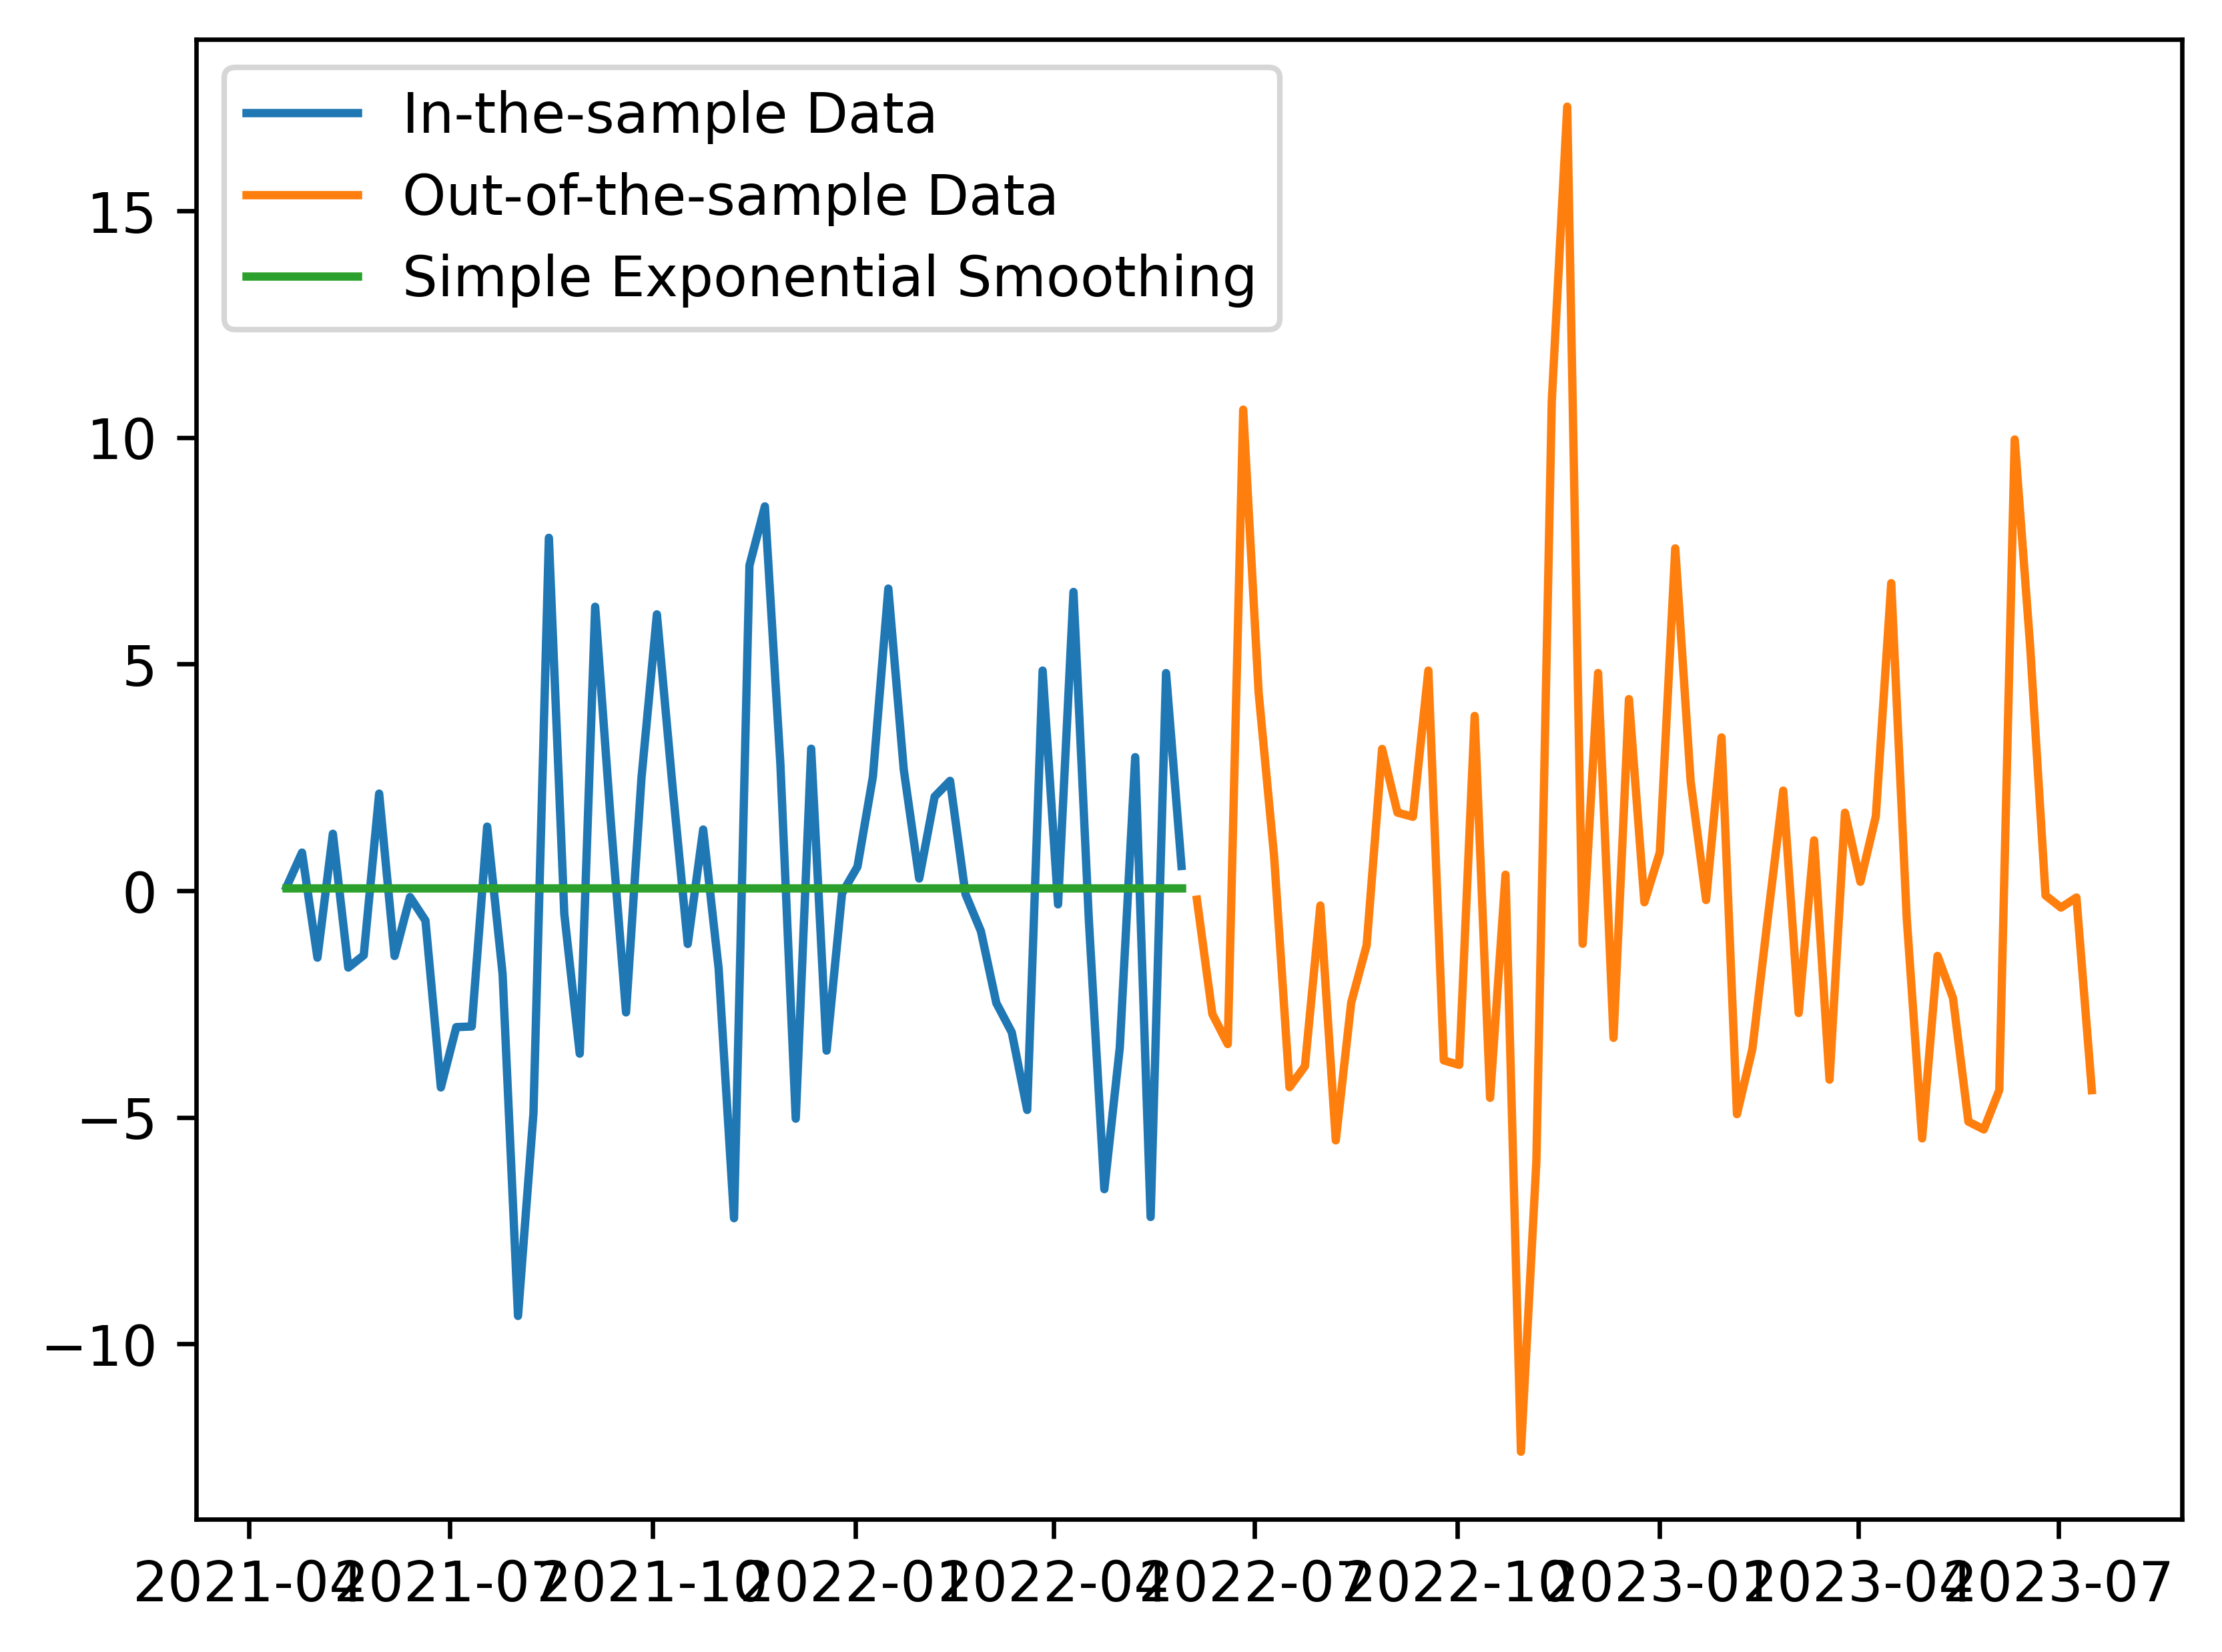

In [69]:
plt.figure(1,dpi=600)
plt.plot(data_insample['dhp'], label='In-the-sample Data')
plt.plot(data_outsample['dhp'], label='Out-of-the-sample Data')
plt.plot(pred, label='Simple Exponential Smoothing')
plt.legend()
plt.show()

In [70]:
def rmse(pred, target):
    return np.sqrt(((pred - target) ** 2).mean())

stats = rmse(pred,data_insample['dhp'])
print('Optimal smoothing coefficient: {}'.format(res.params['smoothing_level']))
print('root mean squared error: {}'.format(stats) )
print('sum-of-squared residuals: {}'.format(res.sse) )

Optimal smoothing coefficient: 1.4901161193847656e-08
root mean squared error: 3.894573215043989
sum-of-squared residuals: 894.8943311129466


In [71]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [72]:
data = data.set_index('date').sort_index()
data_insample = data['2021-04-04':'2023-02-26']
data_insample.tail()

,tencent,dhp
date,,
2023-01-29,37.860,3.380482
2023-02-05,35.993,-4.931326
2023-02-12,34.736,-3.492346
2023-02-19,34.527,-0.601681
2023-02-26,35.289,2.206968


In [73]:
with open(file_path + 'mscibic.pickle', 'wb') as handle:
    pickle.dump(data, handle)

In [74]:
acf,q,pval = smt.acf(data['dhp'],nlags=12,qstat=True)
pacf = smt.pacf(data['dhp'],nlags=12)

correlogram = pd.DataFrame({'acf':acf[1:],
                            'pacf':pacf[1:],
                            'Q':q,
                            'p-val':pval})
correlogram


,acf,pacf,Q,p-val
0,0.128386,0.129474,2.011328,0.156129
1,-0.152653,-0.174958,4.879172,0.087197
2,-0.105275,-0.064761,6.254887,0.099847
3,-0.060085,-0.067660,6.706915,0.152211
4,-0.096906,-0.118045,7.893045,0.162229
5,-0.022517,-0.024709,7.957649,0.241223
6,-0.000080,-0.044321,7.957649,0.336343
7,0.112324,0.100715,9.594280,0.294664
8,-0.088562,-0.160245,10.620960,0.302587
9,0.004292,0.064211,10.623393,0.387601


In [75]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [78]:
data

,tencent,dhp
date,,
2021-04-11,31.891,-0.941169
2021-04-18,31.917,0.081528
2021-04-25,32.185,0.839678
2021-05-02,31.709,-1.478950
2021-05-09,32.107,1.255164
...,...,...
2023-06-18,33.147,5.399218
2023-06-25,33.112,-0.105590
2023-07-02,32.988,-0.374487


In [79]:
import pandas as pd
import statsmodels.tsa.api as smt  # Import the statsmodels.tsa.api library
import pickle  # Import the pickle library

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

# Select the first two columns, assuming 'date' and '700' are column names
data = data[['date', 'tencent']]

# Calculate the percentage change for the '700' column and store it in 'dhp'
data['dhp'] = data['tencent'].transform(lambda x: (x - x.shift(1)) / x.shift(1) * 100)

# Remove rows with missing values
data = data.dropna()

# Display the first few rows of the resulting DataFrame
print(data.head())

        date  tencent       dhp
1 2021-04-11   31.891 -0.941169
2 2021-04-18   31.917  0.081528
3 2021-04-25   32.185  0.839678
4 2021-05-02   31.709 -1.478950
5 2021-05-09   32.107  1.255164


In [80]:
with open(file_path + 'mscibic.pickle', 'wb') as handle:
    pickle.dump(data, handle)

In [81]:
acf,q,pval = smt.acf(data['dhp'],nlags=12,qstat=True)
pacf = smt.pacf(data['dhp'],nlags=12)

correlogram = pd.DataFrame({'acf':acf[1:],
                            'pacf':pacf[1:],
                            'Q':q,
                            'p-val':pval})
correlogram


,acf,pacf,Q,p-val
0,0.128386,0.129474,2.011328,0.156129
1,-0.152653,-0.174958,4.879172,0.087197
2,-0.105275,-0.064761,6.254887,0.099847
3,-0.060085,-0.067660,6.706915,0.152211
4,-0.096906,-0.118045,7.893045,0.162229
5,-0.022517,-0.024709,7.957649,0.241223
6,-0.000080,-0.044321,7.957649,0.336343
7,0.112324,0.100715,9.594280,0.294664
8,-0.088562,-0.160245,10.620960,0.302587
9,0.004292,0.064211,10.623393,0.387601


        date  tencent       dhp
1 2021-04-11   31.891 -0.941169
2 2021-04-18   31.917  0.081528
3 2021-04-25   32.185  0.839678
4 2021-05-02   31.709 -1.478950
5 2021-05-09   32.107  1.255164


<Figure size 1200x600 with 0 Axes>

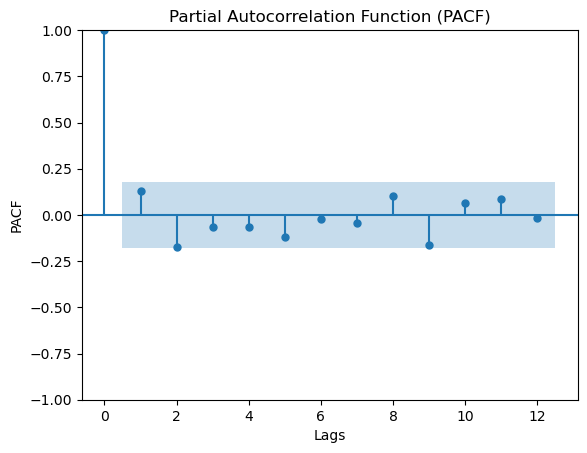

         acf      pacf          Q     p-val
0   0.128386  0.129474   2.011328  0.156129
1  -0.152653 -0.174958   4.879172  0.087197
2  -0.105275 -0.064761   6.254887  0.099847
3  -0.060085 -0.067660   6.706915  0.152211
4  -0.096906 -0.118045   7.893045  0.162229
5  -0.022517 -0.024709   7.957649  0.241223
6  -0.000080 -0.044321   7.957649  0.336343
7   0.112324  0.100715   9.594280  0.294664
8  -0.088562 -0.160245  10.620960  0.302587
9   0.004292  0.064211  10.623393  0.387601
10  0.105460  0.083749  12.106196  0.355714
11  0.017703 -0.016396  12.148369  0.433839


In [83]:
import pandas as pd
import statsmodels.api as sm
import pickle
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

# Select the first two columns, assuming 'date' and 'tencent' are column names
data = data[['date', 'tencent']]

# Calculate the percentage change for the 'tencent' column and store it in 'dhp'
data['dhp'] = data['tencent'].transform(lambda x: (x - x.shift(1)) / x.shift(1) * 100)

# Remove rows with missing values
data = data.dropna()

# Display the first few rows of the resulting DataFrame
print(data.head())

# Save the data using pickle
with open(file_path + 'mscibic.pickle', 'wb') as handle:
    pickle.dump(data, handle)

# Calculate ACF and PACF
acf, q, pval = sm.tsa.acf(data['dhp'], nlags=12, qstat=True)
pacf = sm.tsa.pacf(data['dhp'], nlags=12)

# Create a correlogram DataFrame
correlogram = pd.DataFrame({'acf': acf[1:], 'pacf': pacf[1:], 'Q': q, 'p-val': pval})

# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(data['dhp'], lags=12, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

# Display the correlogram DataFrame
print(correlogram)

In [84]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)


In [85]:
data = data.set_index('date').sort_index()
data_insample = data['2021-04-04':'2023-02-26']
data_insample.tail()


,tencent,dhp
date,,
2023-01-29,37.860,3.380482
2023-02-05,35.993,-4.931326
2023-02-12,34.736,-3.492346
2023-02-19,34.527,-0.601681
2023-02-26,35.289,2.206968


In [86]:
model = smt.ARIMA(data_insample['dhp'], order=(2,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dhp   No. Observations:                   99
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -286.967
Date:                Thu, 19 Oct 2023   AIC                            581.935
Time:                        15:25:35   BIC                            592.315
Sample:                    04-11-2021   HQIC                           586.135
                         - 02-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1928      0.449      0.429      0.668      -0.688       1.074
ar.L1          0.1309      0.087      1.502      0.133      -0.040       0.302
ar.L2         -0.1722      0.082     -2.111      0.0

        date  tencent       dhp
1 2021-04-11   31.891 -0.941169
2 2021-04-18   31.917  0.081528
3 2021-04-25   32.185  0.839678
4 2021-05-02   31.709 -1.478950
5 2021-05-09   32.107  1.255164


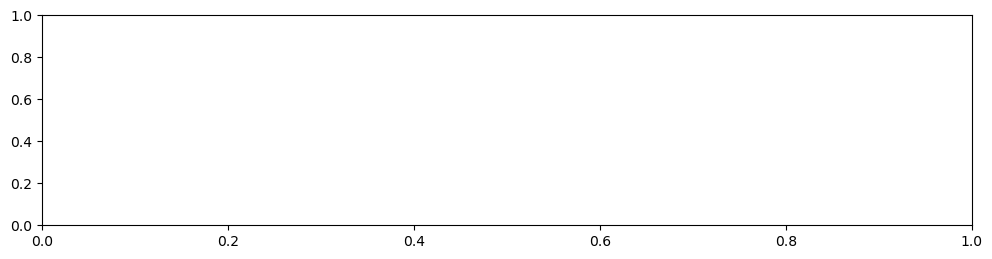

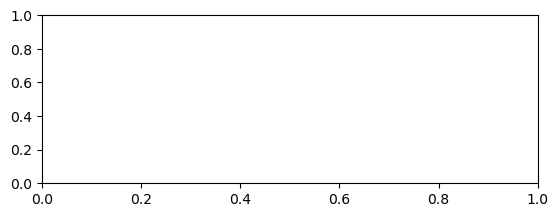

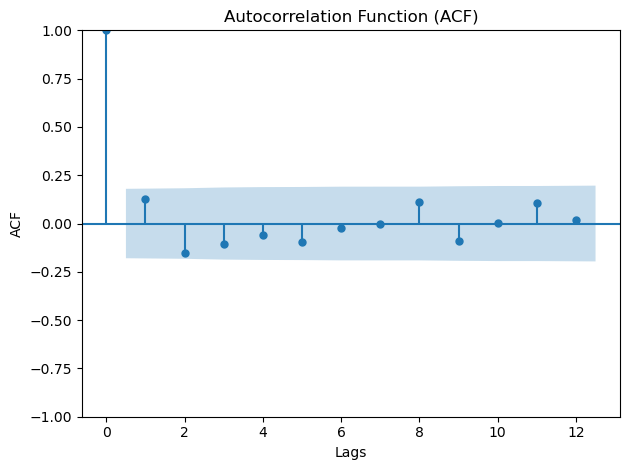

         acf      pacf          Q     p-val
0   0.128386  0.129474   2.011328  0.156129
1  -0.152653 -0.174958   4.879172  0.087197
2  -0.105275 -0.064761   6.254887  0.099847
3  -0.060085 -0.067660   6.706915  0.152211
4  -0.096906 -0.118045   7.893045  0.162229
5  -0.022517 -0.024709   7.957649  0.241223
6  -0.000080 -0.044321   7.957649  0.336343
7   0.112324  0.100715   9.594280  0.294664
8  -0.088562 -0.160245  10.620960  0.302587
9   0.004292  0.064211  10.623393  0.387601
10  0.105460  0.083749  12.106196  0.355714
11  0.017703 -0.016396  12.148369  0.433839


In [89]:
import pandas as pd
import statsmodels.api as sm
import pickle
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

# Select the first two columns, assuming 'date' and 'tencent' are column names
data = data[['date', 'tencent']]

# Calculate the percentage change for the 'tencent' column and store it in 'dhp'
data['dhp'] = data['tencent'].transform(lambda x: (x - x.shift(1)) / x.shift(1) * 100)

# Remove rows with missing values
data = data.dropna()

# Display the first few rows of the resulting DataFrame
print(data.head())

# Save the data using pickle
with open(file_path + 'mscibic.pickle', 'wb') as handle:
    pickle.dump(data, handle)

# Calculate ACF and PACF
acf, q, pval = sm.tsa.acf(data['dhp'], nlags=12, qstat=True)
pacf = sm.tsa.pacf(data['dhp'], nlags=12)

# Create a correlogram DataFrame
correlogram = pd.DataFrame({'acf': acf[1:], 'pacf': pacf[1:], 'Q': q, 'p-val': pval})

# Plot PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_pacf(data['dhp'], lags=12, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')

# Plot ACF
plt.subplot(212)
plot_acf(data['dhp'], lags=12, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')

plt.tight_layout()
plt.show()

# Display the correlogram DataFrame
print(correlogram)

In [90]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Assuming you already have your data in a variable 'data'
result = adfuller(data['dhp'])

print('Augmented Dickey-Fuller Test:')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check for stationarity
if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")


Augmented Dickey-Fuller Test:
ADF Statistic: -8.355472939821711
p-value: 2.917173873189479e-13
Critical Values:
   1%: -3.487517288664615
   5%: -2.8865777180380032
   10%: -2.5801239192052012
The time series is likely stationary.


In [91]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)


In [92]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [93]:
data = data.set_index('date').sort_index()
data_insample = data['2021-04-04':'2023-02-26']
data_insample.tail()

,tencent,dhp
date,,
2023-01-29,37.860,3.380482
2023-02-05,35.993,-4.931326
2023-02-12,34.736,-3.492346
2023-02-19,34.527,-0.601681
2023-02-26,35.289,2.206968


In [96]:
model = smt.ARIMA(data_insample['dhp'], order=(2,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dhp   No. Observations:                   99
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -286.967
Date:                Thu, 19 Oct 2023   AIC                            581.935
Time:                        16:01:19   BIC                            592.315
Sample:                    04-11-2021   HQIC                           586.135
                         - 02-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1928      0.449      0.429      0.668      -0.688       1.074
ar.L1          0.1309      0.087      1.502      0.133      -0.040       0.302
ar.L2         -0.1722      0.082     -2.111      0.0

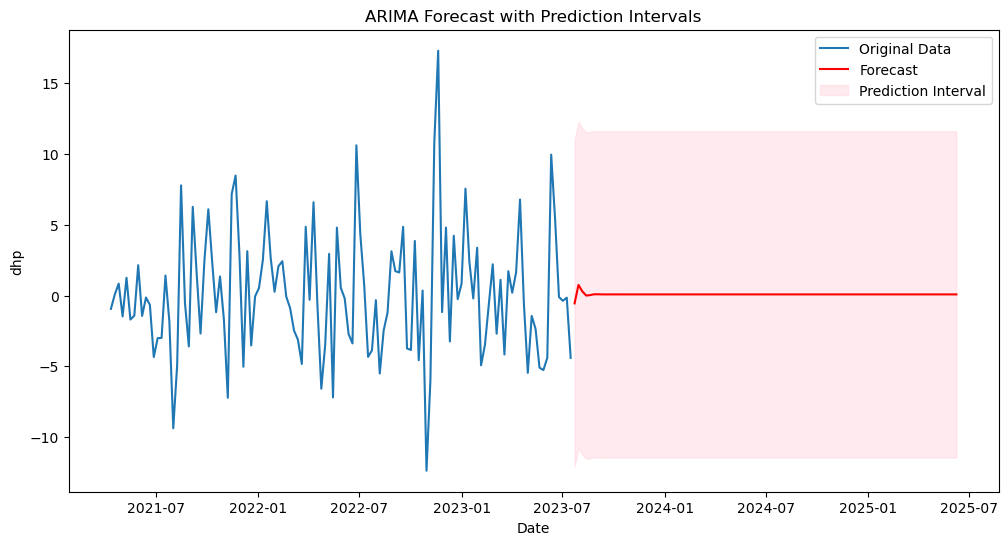

In [101]:
import scipy.stats as stats

# Generate forecasts
forecast = res.forecast(steps=len(data['dhp']))
forecast_index = pd.date_range(start='2023-03-05', periods=len(data['dhp']), freq='W')

# Calculate the prediction intervals
alpha = 0.05  # You can adjust the confidence level as needed
z = stats.norm.ppf(1 - alpha / 2)
stderr = np.std(data['dhp'].diff().dropna(), ddof=1)
lower_bound = forecast - z * stderr
upper_bound = forecast + z * stderr

# Create a DataFrame for the forecasts and prediction intervals
forecast_df = pd.DataFrame({'Forecast': forecast, 'LowerBound': lower_bound, 'UpperBound': upper_bound}, index=forecast_index)

# Plot the original data, the forecasts, and the prediction intervals
plt.figure(figsize=(12, 6))
plt.plot(data['dhp'], label='Original Data')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_df['LowerBound'], forecast_df['UpperBound'], color='pink', alpha=0.3, label='Prediction Interval')
plt.xlabel('Date')
plt.ylabel('dhp')
plt.legend()
plt.title('ARIMA Forecast with Prediction Intervals')
plt.show()

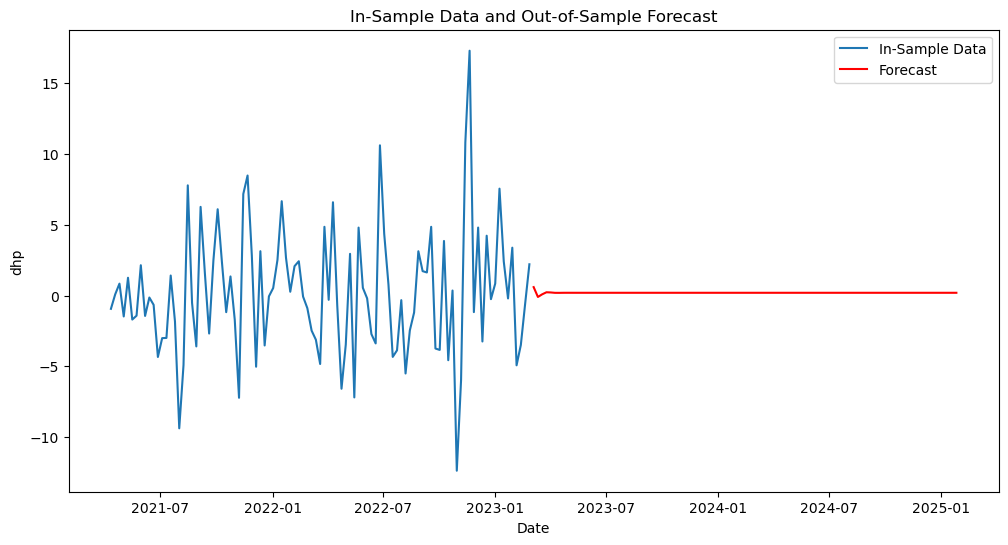

In [103]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

data = data.set_index('date').sort_index()
data_insample = data['2021-04-04':'2023-02-26']

# Fit the ARIMA model on the in-sample data
model = smt.ARIMA(data_insample['dhp'], order=(2, 0, 0))
res = model.fit()

# Generate forecasts for the out-of-sample period
forecast = res.forecast(steps=100)  # Adjust the number of forecast steps as needed

# Create date indices for the out-of-sample period
forecast_index = pd.date_range(start='2023-03-05', periods=len(forecast), freq='W')

# Plot the original in-sample data and overlay the forecast
plt.figure(figsize=(12, 6))
plt.plot(data_insample['dhp'], label='In-Sample Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('dhp')
plt.legend()
plt.title('In-Sample Data and Out-of-Sample Forecast')
plt.show()

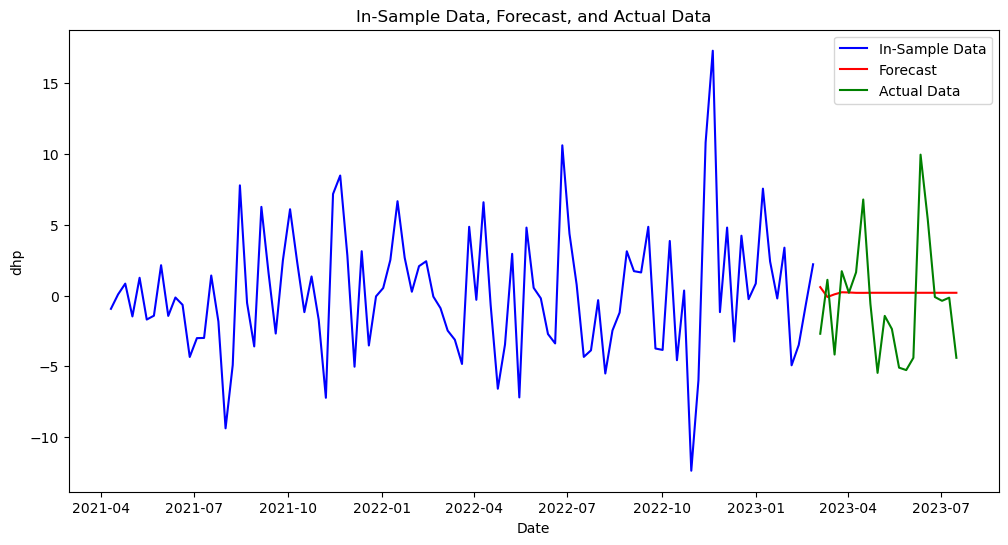

In [104]:
import pickle
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the pickle file
with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

# Set the date column as the index and sort the data
data = data.set_index('date').sort_index()

# Define the in-sample and out-of-sample date ranges
in_sample_start_date = '2021-04-04'
in_sample_end_date = '2023-02-26'
out_sample_start_date = '2023-03-05'
out_sample_end_date = '2023-07-16'

# Extract the in-sample and out-of-sample data
data_insample = data[in_sample_start_date:in_sample_end_date]
data_outsample = data[out_sample_start_date:out_sample_end_date]

# Fit the ARIMA model on the in-sample data
model = smt.ARIMA(data_insample['dhp'], order=(2, 0, 0))
res = model.fit()

# Generate forecasts for the out-of-sample period
forecast = res.forecast(steps=len(data_outsample))  # Forecast length matches the out-of-sample period

# Create date indices for the out-of-sample period
forecast_index = pd.date_range(start=out_sample_start_date, end=out_sample_end_date, freq='W')

# Plot both the actual and forecasted data on the same graph
plt.figure(figsize=(12, 6))
plt.plot(data_insample['dhp'], label='In-Sample Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.plot(data_outsample.index, data_outsample['dhp'], label='Actual Data', color='green')
plt.xlabel('Date')
plt.ylabel('dhp')
plt.legend()
plt.title('In-Sample Data, Forecast, and Actual Data')
plt.show()


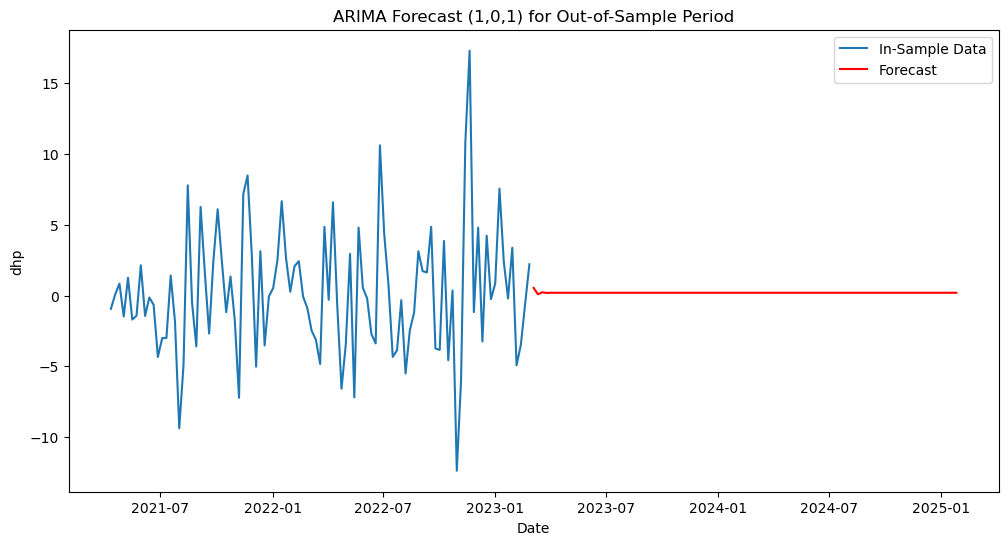

In [105]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

data = data.set_index('date').sort_index()
data_insample = data['2021-04-04':'2023-02-26']

# Fit an ARIMA model with order (1, 0, 1)
model = smt.ARIMA(data_insample['dhp'], order=(1, 0, 1))
res = model.fit()

# Generate forecasts for the out-of-sample period (March 5, 2023, to July 16, 2023)
forecast = res.forecast(steps=100)  # Adjust the number of forecast steps as needed

# Create date indices for the out-of-sample period
forecast_index = pd.date_range(start='2023-03-05', periods=len(forecast), freq='W')

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data_insample['dhp'], label='In-Sample Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('dhp')
plt.legend()
plt.title('ARIMA Forecast (1,0,1) for Out-of-Sample Period')
plt.show()


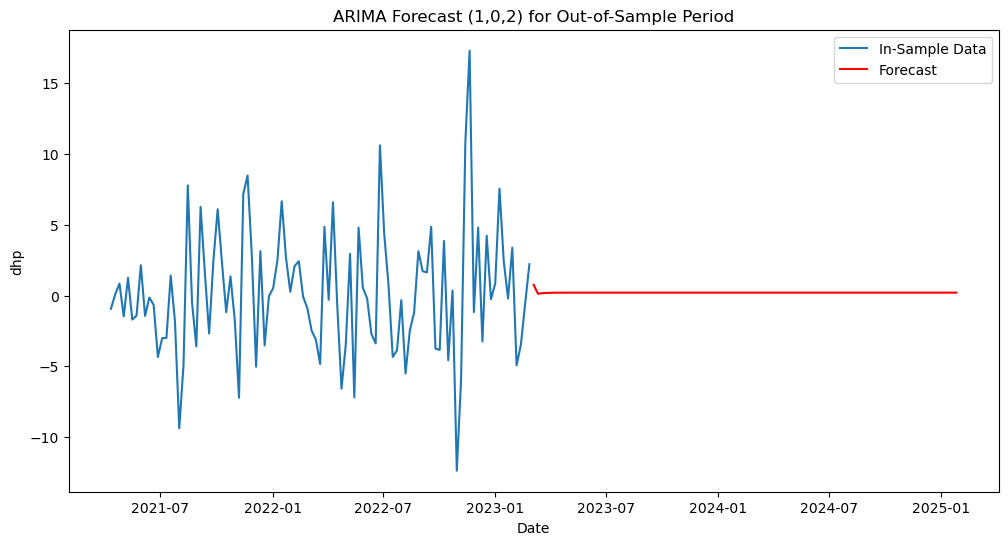

In [106]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)

data = data.set_index('date').sort_index()
data_insample = data['2021-04-04':'2023-02-26']

# Fit an ARIMA model with order (1, 0, 2)
model = smt.ARIMA(data_insample['dhp'], order=(1, 0, 2))
res = model.fit()

# Generate forecasts for the out-of-sample period (March 5, 2023, to July 16, 2023)
forecast = res.forecast(steps=100)  # Adjust the number of forecast steps as needed

# Create date indices for the out-of-sample period
forecast_index = pd.date_range(start='2023-03-05', periods=len(forecast), freq='W')

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data_insample['dhp'], label='In-Sample Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('dhp')
plt.legend()
plt.title('ARIMA Forecast (1,0,2) for Out-of-Sample Period')
plt.show()

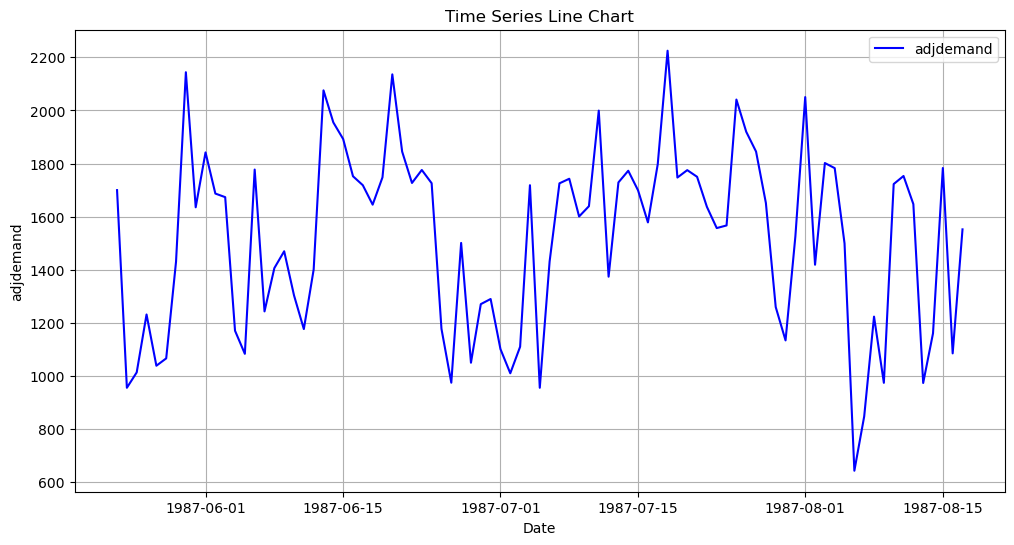

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path and sheet name
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
sheet_name = "fcast"

# Read the Excel file
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data until the date '1987/08/17'
end_date = pd.to_datetime('1987-08-17')
data = data[data['Date'] <= end_date]

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['adjdemand'], label='adjdemand', color='blue')
plt.xlabel('Date')
plt.ylabel('adjdemand')
plt.title('Time Series Line Chart')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()

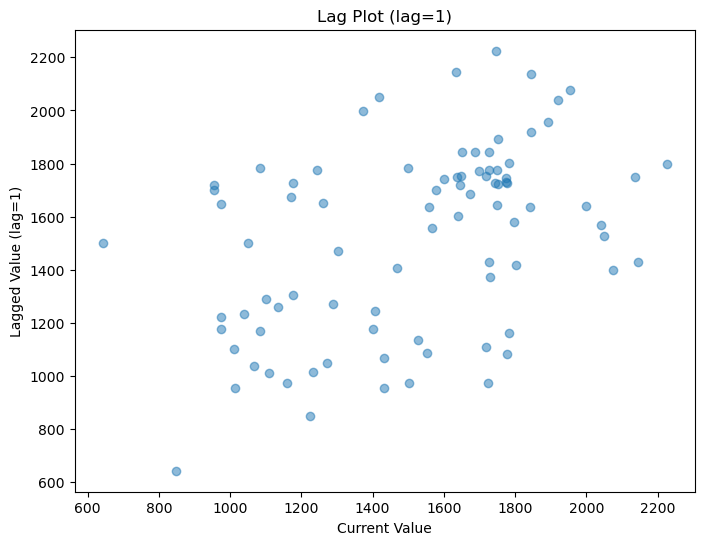

In [111]:
import pandas as pd

# Load the data from an Excel file
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
sheet_name = "fcast"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure your 'Date' column is of datetime type
data['Date'] = pd.to_datetime(data['Date'])
import matplotlib.pyplot as plt

# Define the lag value (e.g., lag of 1)
lag = 1

# Create a lag plot
plt.figure(figsize=(8, 6))
plt.scatter(data['adjdemand'], data['adjdemand'].shift(lag), alpha=0.5)
plt.title(f'Lag Plot (lag={lag})')
plt.xlabel('Current Value')
plt.ylabel(f'Lagged Value (lag={lag})')
plt.show()

In [113]:
data

,Date,adjdemand
0,1987-05-23,1699.868959
1,1987-05-24,955.429497
2,1987-05-25,1013.482406
3,1987-05-26,1231.574635
4,1987-05-27,1038.504927
...,...,...
93,1987-08-24,NaN
94,1987-08-25,NaN
95,1987-08-26,NaN
96,1987-08-27,NaN


In [114]:
import pandas as pd
import statsmodels.tsa.api as smt  # Import the statsmodels.tsa.api library
import pickle  # Import the pickle library

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='fcast')

# Select the first two columns, assuming 'date' and '700' are column names
data = data[['date', 'adjdemand']]

# Calculate the percentage change for the '700' column and store it in 'dhp'
data['dhp'] = data['adjdemand'].transform(lambda x: (x - x.shift(1)) / x.shift(1) * 100)

# Remove rows with missing values
data = data.dropna()

# Display the first few rows of the resulting DataFrame
print(data.head())

        date    adjdemand        dhp
1 1987-05-24   955.429497 -43.793932
2 1987-05-25  1013.482406   6.076106
3 1987-05-26  1231.574635  21.519094
4 1987-05-27  1038.504927 -15.676655
5 1987-05-28  1066.154546   2.662445


In [115]:
with open(file_path + 'mmm.pickle', 'wb') as handle:
    pickle.dump(data, handle)

In [116]:
acf,q,pval = smt.acf(data['dhp'],nlags=12,qstat=True)
pacf = smt.pacf(data['dhp'],nlags=12)

correlogram = pd.DataFrame({'acf':acf[1:],
                            'pacf':pacf[1:],
                            'Q':q,
                            'p-val':pval})
correlogram


,acf,pacf,Q,p-val
0,-0.270129,-0.273307,6.496877,1.080642e-02
1,-0.132845,-0.227714,8.086850,1.753730e-02
2,0.049279,-0.064756,8.308275,4.005224e-02
3,-0.011255,-0.052130,8.319967,8.053606e-02
4,-0.143886,-0.194062,10.254304,6.834209e-02
5,-0.300406,-0.530047,18.791344,4.530924e-03
6,0.644973,0.518989,58.642156,2.816419e-10
7,-0.206583,-0.085435,62.782865,1.322144e-10
8,-0.052719,0.064845,63.056033,3.440817e-10
9,0.078371,-0.058919,63.667641,7.283384e-10


<Figure size 1200x600 with 0 Axes>

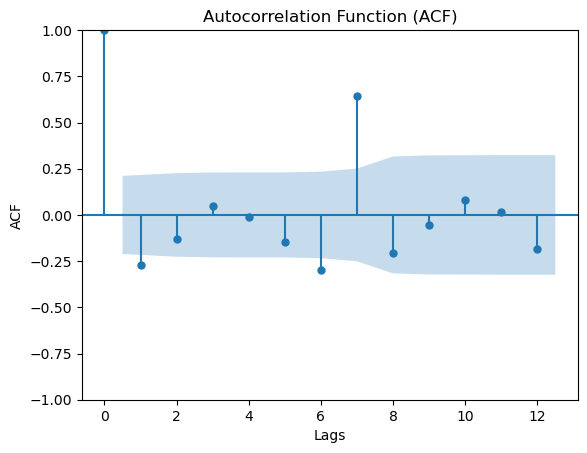

<Figure size 1200x600 with 0 Axes>

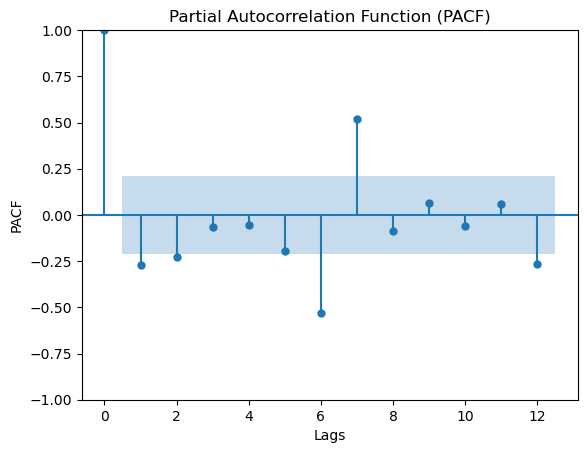

In [117]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(data['dhp'], lags=12, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(data['dhp'], lags=12, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

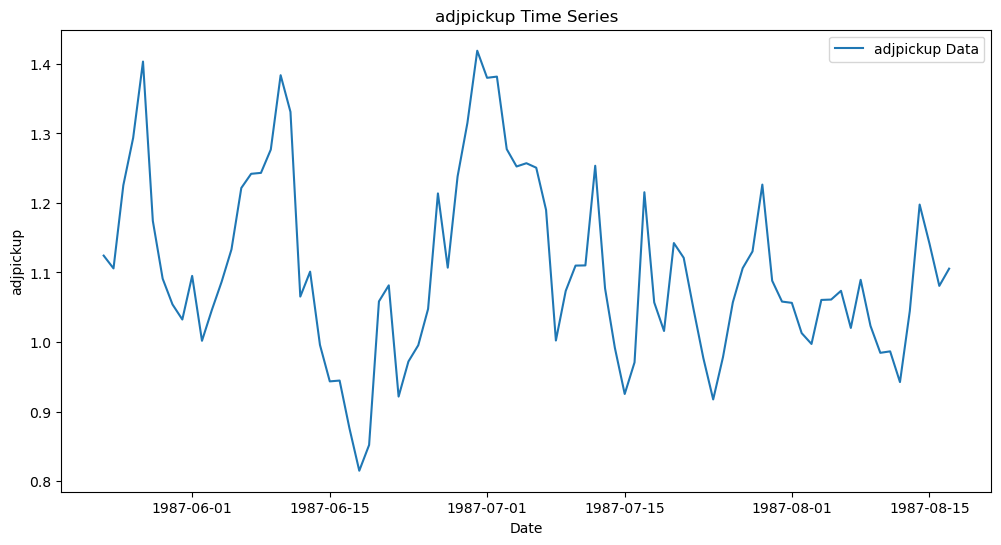

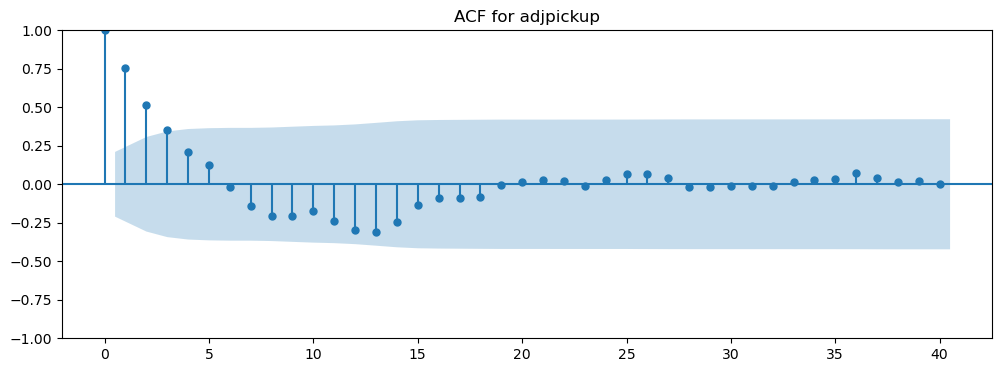

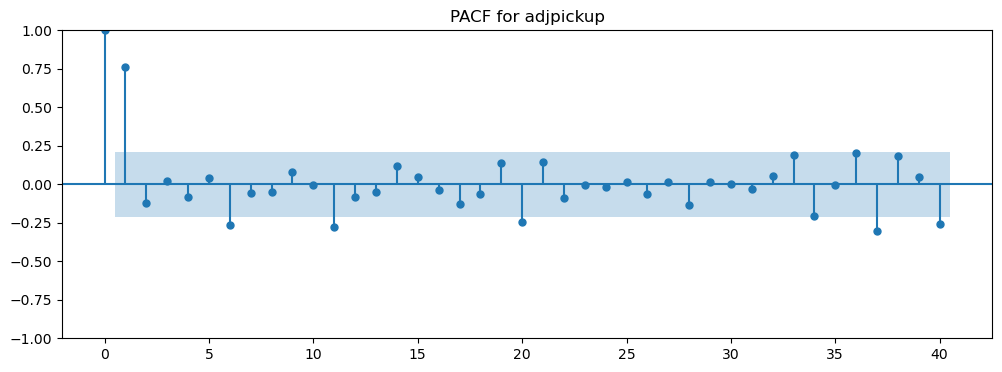

Dickey-Fuller Test Results for adjpickup:
Test Statistic: -3.4444253694422273
p-value: 0.009534485677945417
Critical Values:
  1%: -3.5087828609430614
  5%: -2.895783561573195
  10%: -2.5850381719848565
Stationary (Reject the null hypothesis)


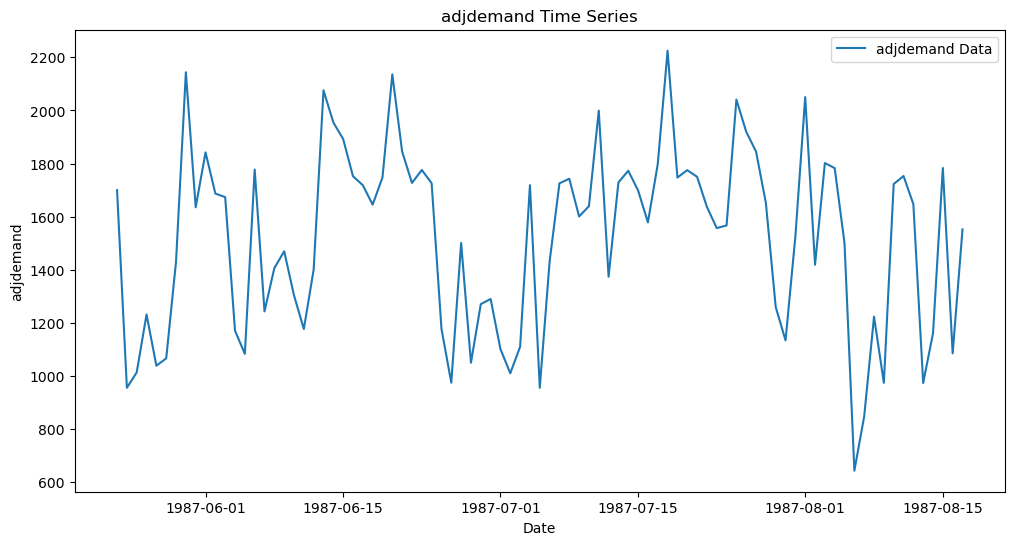

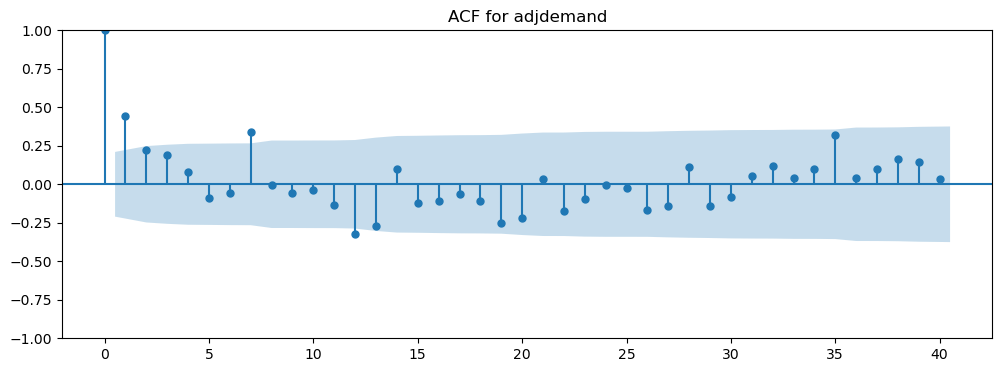

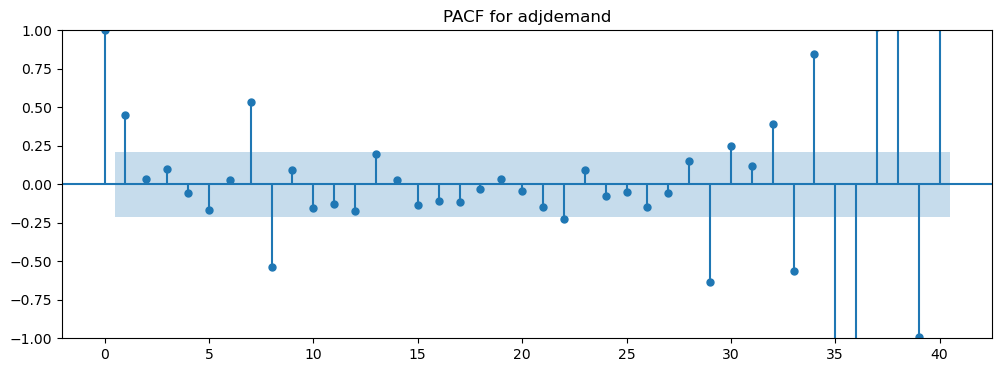

Dickey-Fuller Test Results for adjdemand:
Test Statistic: -3.080401047506712
p-value: 0.028038009354899304
Critical Values:
  1%: -3.5194805351545413
  5%: -2.9003945086747343
  10%: -2.5874984279778395
Stationary (Reject the null hypothesis)


In [118]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the data from the Excel file
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
sheet_name = 'fd'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Convert the 'date' column to a datetime type
data['date'] = pd.to_datetime(data['date'])

# Separate the data for 'adjpickup' and 'adjdemand'
adjpickup_data = data[['date', 'adjpickup']]
adjdemand_data = data[['date', 'adjdemand']]

# Function to create line graph, ACF, PACF, and conduct Dickey-Fuller test
def analyze_time_series(data, column_name):
    # Line Graph
    plt.figure(figsize=(12, 6))
    plt.plot(data['date'], data[column_name], label=f'{column_name} Data')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.title(f'{column_name} Time Series')
    plt.legend()
    plt.show()

    # ACF Plot
    fig, ax = plt.subplots(figsize=(12, 4))
    tsaplots.plot_acf(data[column_name], lags=40, ax=ax)
    plt.title(f'ACF for {column_name}')
    plt.show()

    # PACF Plot
    fig, ax = plt.subplots(figsize=(12, 4))
    tsaplots.plot_pacf(data[column_name], lags=40, ax=ax)
    plt.title(f'PACF for {column_name}')
    plt.show()

    # Dickey-Fuller Test
    result = adfuller(data[column_name], autolag='AIC')
    print(f"Dickey-Fuller Test Results for {column_name}:")
    print(f'Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value}')
    if result[1] <= 0.05:
        print("Stationary (Reject the null hypothesis)")
    else:
        print("Non-Stationary (Fail to reject the null hypothesis)")

# Analyze 'adjpickup' time series
analyze_time_series(adjpickup_data, 'adjpickup')

# Analyze 'adjdemand' time series
analyze_time_series(adjdemand_data, 'adjdemand')

In [136]:
import pandas as pd
import statsmodels.api as sm
import pickle

# Load the data
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
sheet_name = 'fd'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define a function to fit ARIMA models and calculate AIC and BIC
def fit_arima_get_scores(data, p, d, q):
    model = sm.tsa.ARIMA(data, order=(p, d, q))
    results = model.fit()
    return results.aic, results.bic

# Calculate AIC and BIC for 'adjpickup'
adjpickup_data = data['adjpickup']
min_aic_adjpickup, min_bic_adjpickup = float('inf'), float('inf')
best_p_adjpickup, best_d_adjpickup, best_q_adjpickup = None, None, None

# Calculate AIC and BIC for 'adjdemand'
adjdemand_data = data['adjdemand']
min_aic_adjdemand, min_bic_adjdemand = float('inf'), float('inf')
best_p_adjdemand, best_d_adjdemand, best_q_adjdemand = None, None, None

# Iterate over different (p, d, q) combinations and find the minimum AIC and BIC
for p in range(5):  # You can change the range based on your needs
    for d in range(2):  # You can change the range based on your needs
        for q in range(5):  # You can change the range based on your needs
            aic_adjpickup, bic_adjpickup = fit_arima_get_scores(adjpickup_data, p, d, q)
            aic_adjdemand, bic_adjdemand = fit_arima_get_scores(adjdemand_data, p, d, q)

            if aic_adjpickup < min_aic_adjpickup:
                min_aic_adjpickup = aic_adjpickup
                best_p_adjpickup, best_d_adjpickup, best_q_adjpickup = p, d, q

            if bic_adjpickup < min_bic_adjpickup:
                min_bic_adjpickup = bic_adjpickup

            if aic_adjdemand < min_aic_adjdemand:
                min_aic_adjdemand = aic_adjdemand
                best_p_adjdemand, best_d_adjdemand, best_q_adjdemand = p, d, q

            if bic_adjdemand < min_bic_adjdemand:
                min_bic_adjdemand = bic_adjdemand

# Print the results
print("Minimum AIC for 'adjpickup':", min_aic_adjpickup)
print("Minimum BIC for 'adjpickup':", min_bic_adjpickup)
print("Best (p, d, q) for 'adjpickup':", best_p_adjpickup, best_d_adjpickup, best_q_adjpickup)

print("Minimum AIC for 'adjdemand':", min_aic_adjdemand)
print("Minimum BIC for 'adjdemand':", min_bic_adjdemand)
print("Best (p, d, q) for 'adjdemand':", best_p_adjdemand, best_d_adjdemand, best_q_adjdemand)


Minimum AIC for 'adjpickup': -174.37438287352487
Minimum BIC for 'adjpickup': -166.9766585175611
Best (p, d, q) for 'adjpickup': 1 0 0
Minimum AIC for 'adjdemand': 1225.3762276412606
Minimum BIC for 'adjdemand': 1242.5566587150352
Best (p, d, q) for 'adjdemand': 2 1 4


In [122]:
import pandas as pd
import statsmodels.api as sm
import pickle

# Load the data
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
sheet_name = 'fd'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define ARIMA order parameters
p_adjpickup, d_adjpickup, q_adjpickup = 1, 0, 0
p_adjdemand, d_adjdemand, q_adjdemand = 2, 1, 4

# Create separate ARIMA models for 'adjpickup' and 'adjdemand'
model_adjpickup = sm.tsa.ARIMA(data['adjpickup'], order=(p_adjpickup, d_adjpickup, q_adjpickup))
results_adjpickup = model_adjpickup.fit()

model_adjdemand = sm.tsa.ARIMA(data['adjdemand'], order=(p_adjdemand, d_adjdemand, q_adjdemand))
results_adjdemand = model_adjdemand.fit()

# Print the summaries of the ARIMA models
print("ARIMA Model for 'adjpickup':")
print(results_adjpickup.summary())

print("\nARIMA Model for 'adjdemand':")
print(results_adjdemand.summary())


ARIMA Model for 'adjpickup':
                               SARIMAX Results                                
Dep. Variable:              adjpickup   No. Observations:                   87
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  90.187
Date:                Fri, 20 Oct 2023   AIC                           -174.374
Time:                        03:40:50   BIC                           -166.977
Sample:                             0   HQIC                          -171.396
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1046      0.037     29.923      0.000       1.032       1.177
ar.L1          0.7445      0.067     11.153      0.000       0.614       0.875
sigma2         0.0073  

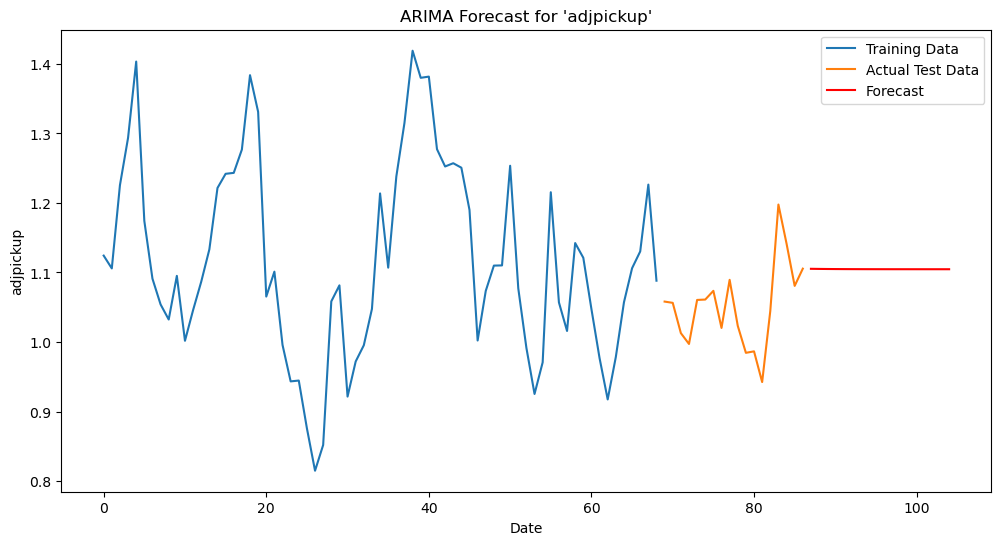

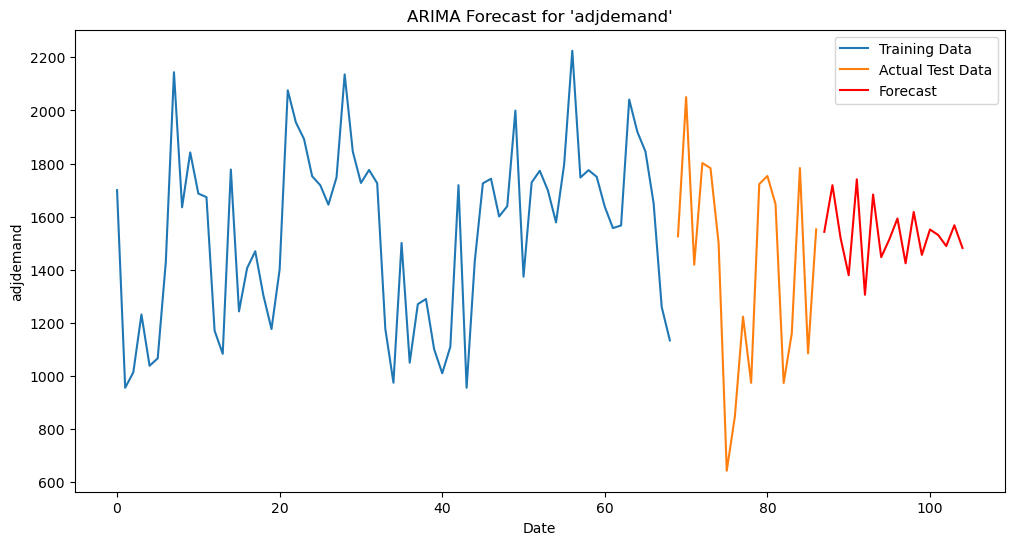

In [123]:
import pandas as pd
import statsmodels.api as sm
import pickle
import matplotlib.pyplot as plt

# Load the data
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
sheet_name = 'fd'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define ARIMA order parameters
p_adjpickup, d_adjpickup, q_adjpickup = 1, 0, 0
p_adjdemand, d_adjdemand, q_adjdemand = 2, 1, 4

# Create separate ARIMA models for 'adjpickup' and 'adjdemand'
model_adjpickup = sm.tsa.ARIMA(data['adjpickup'], order=(p_adjpickup, d_adjpickup, q_adjpickup))
results_adjpickup = model_adjpickup.fit()

model_adjdemand = sm.tsa.ARIMA(data['adjdemand'], order=(p_adjdemand, d_adjdemand, q_adjdemand))
results_adjdemand = model_adjdemand.fit()

# Split the data into training (80%) and test (20%)
split_percentage = 0.8
split_index = int(len(data) * split_percentage)

# Split 'adjpickup' data
adjpickup_train, adjpickup_test = data['adjpickup'][:split_index], data['adjpickup'][split_index:]

# Split 'adjdemand' data
adjdemand_train, adjdemand_test = data['adjdemand'][:split_index], data['adjdemand'][split_index:]

# Generate forecasts for 'adjpickup' and 'adjdemand'
forecast_adjpickup = results_adjpickup.forecast(steps=len(adjpickup_test))
forecast_adjdemand = results_adjdemand.forecast(steps=len(adjdemand_test))

# Plot the forecasts and actual test data for 'adjpickup'
plt.figure(figsize=(12, 6))
plt.plot(adjpickup_train, label='Training Data')
plt.plot(adjpickup_test, label='Actual Test Data')
plt.plot(forecast_adjpickup, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('adjpickup')
plt.legend()
plt.title("ARIMA Forecast for 'adjpickup'")
plt.show()

# Plot the forecasts and actual test data for 'adjdemand'
plt.figure(figsize=(12, 6))
plt.plot(adjdemand_train, label='Training Data')
plt.plot(adjdemand_test, label='Actual Test Data')
plt.plot(forecast_adjdemand, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('adjdemand')
plt.legend()
plt.title("ARIMA Forecast for 'adjdemand'")
plt.show()

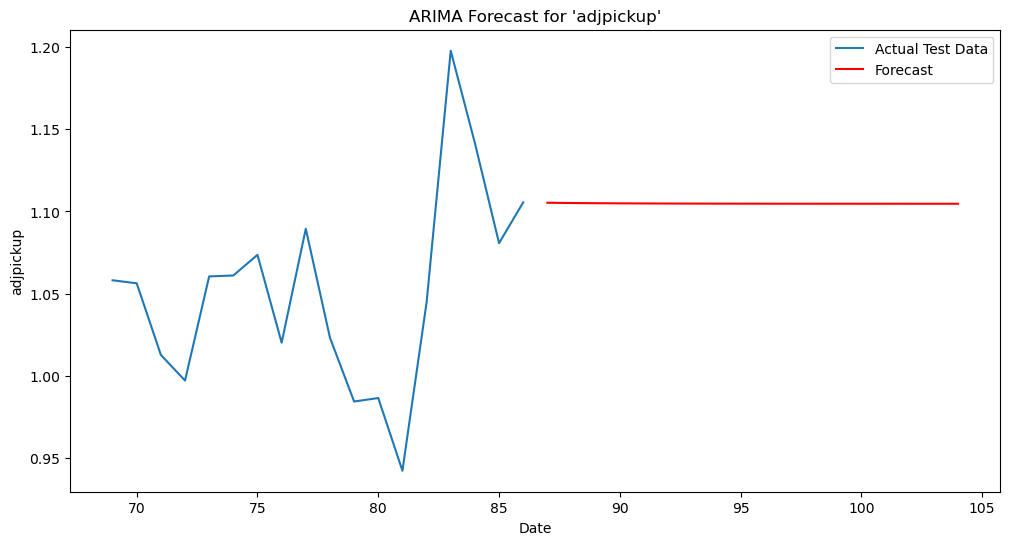

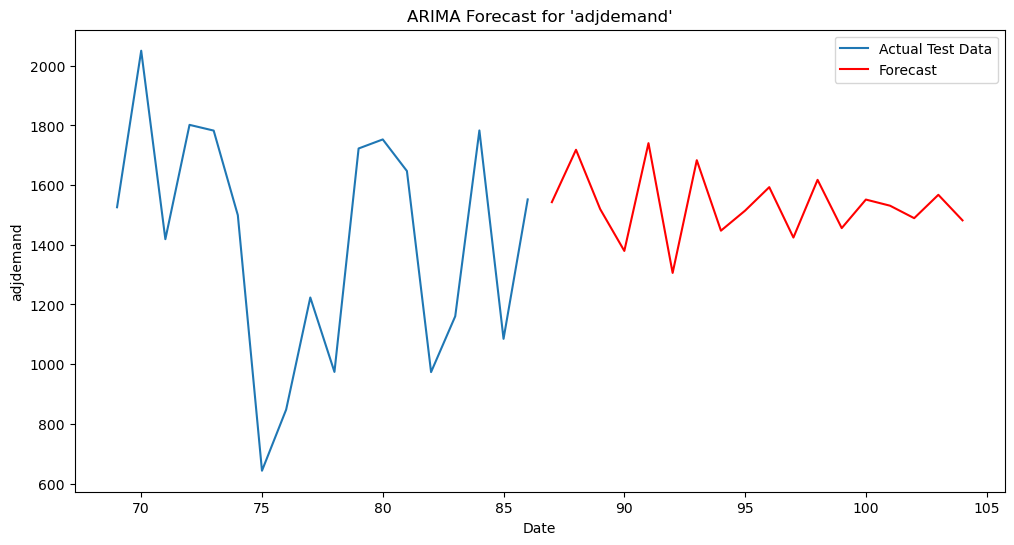

In [124]:
import pandas as pd
import statsmodels.api as sm
import pickle
import matplotlib.pyplot as plt

# Load the data
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
sheet_name = 'fd'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define ARIMA order parameters
p_adjpickup, d_adjpickup, q_adjpickup = 1, 0, 0
p_adjdemand, d_adjdemand, q_adjdemand = 2, 1, 4

# Create separate ARIMA models for 'adjpickup' and 'adjdemand'
model_adjpickup = sm.tsa.ARIMA(data['adjpickup'], order=(p_adjpickup, d_adjpickup, q_adjpickup))
results_adjpickup = model_adjpickup.fit()

model_adjdemand = sm.tsa.ARIMA(data['adjdemand'], order=(p_adjdemand, d_adjdemand, q_adjdemand))
results_adjdemand = model_adjdemand.fit()

# Split the data into training (80%) and test (20%)
split_percentage = 0.8
split_index = int(len(data) * split_percentage)

# Generate forecasts for 'adjpickup' and 'adjdemand' for the last 20%
forecast_adjpickup = results_adjpickup.forecast(steps=len(data) - split_index)
forecast_adjdemand = results_adjdemand.forecast(steps=len(data) - split_index)

# Extract the actual test data for 'adjpickup' and 'adjdemand' for the last 20%
actual_adjpickup = data['adjpickup'][split_index:]
actual_adjdemand = data['adjdemand'][split_index:]

# Plot the forecasts and actual test data for 'adjpickup'
plt.figure(figsize=(12, 6))
plt.plot(actual_adjpickup, label='Actual Test Data')
plt.plot(forecast_adjpickup, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('adjpickup')
plt.legend()
plt.title("ARIMA Forecast for 'adjpickup'")
plt.show()

# Plot the forecasts and actual test data for 'adjdemand'
plt.figure(figsize=(12, 6))
plt.plot(actual_adjdemand, label='Actual Test Data')
plt.plot(forecast_adjdemand, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('adjdemand')
plt.legend()
plt.title("ARIMA Forecast for 'adjdemand'")
plt.show()


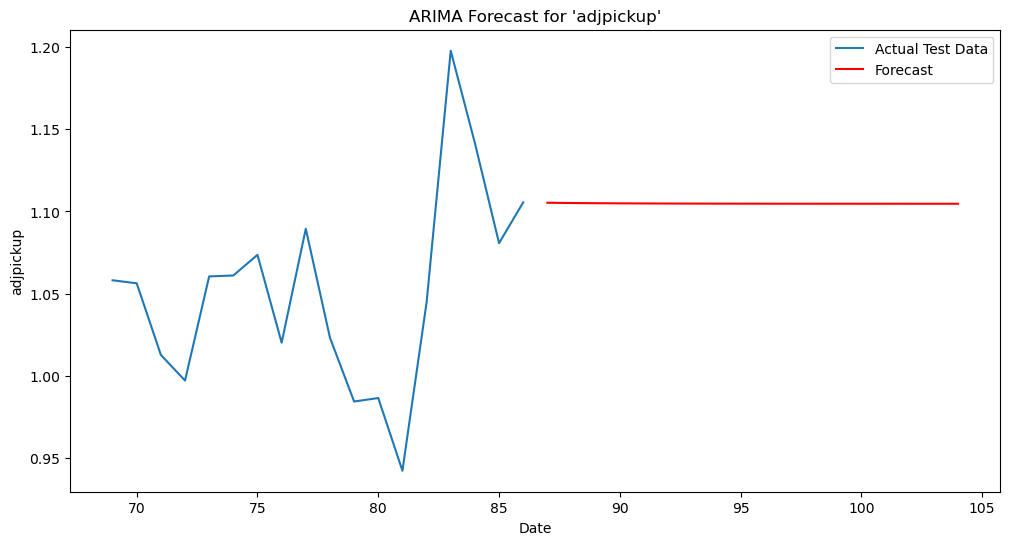

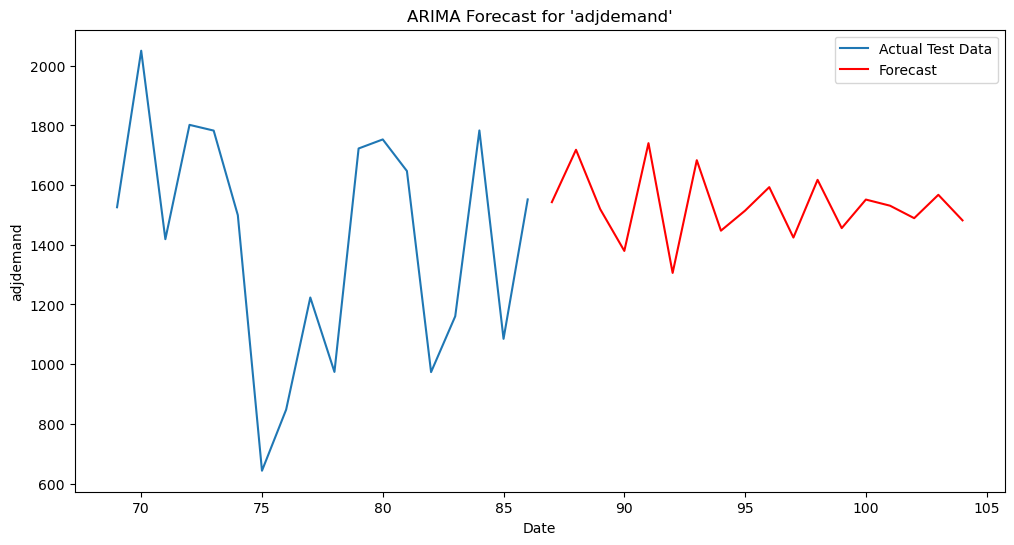

In [125]:
import pandas as pd
import statsmodels.api as sm
import pickle
import matplotlib.pyplot as plt

# Load the data
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
sheet_name = 'fd'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define ARIMA order parameters
p_adjpickup, d_adjpickup, q_adjpickup = 1, 0, 0
p_adjdemand, d_adjdemand, q_adjdemand = 2, 1, 4

# Create separate ARIMA models for 'adjpickup' and 'adjdemand'
model_adjpickup = sm.tsa.ARIMA(data['adjpickup'], order=(p_adjpickup, d_adjpickup, q_adjpickup))
results_adjpickup = model_adjpickup.fit()

model_adjdemand = sm.tsa.ARIMA(data['adjdemand'], order=(p_adjdemand, d_adjdemand, q_adjdemand))
results_adjdemand = model_adjdemand.fit()

# Split the data into training (80%) and test (20%)
split_percentage = 0.8
split_index = int(len(data) * split_percentage)

# Generate forecasts for 'adjpickup' and 'adjdemand' for the last 20%
forecast_adjpickup = results_adjpickup.forecast(steps=len(data) - split_index)
forecast_adjdemand = results_adjdemand.forecast(steps=len(data) - split_index)

# Extract the actual test data for 'adjpickup' and 'adjdemand' for the last 20%
actual_adjpickup = data['adjpickup'][split_index:]
actual_adjdemand = data['adjdemand'][split_index:]

# Plot the forecasts and actual test data for 'adjpickup'
plt.figure(figsize=(12, 6))
plt.plot(actual_adjpickup, label='Actual Test Data')
plt.plot(forecast_adjpickup, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('adjpickup')
plt.legend()
plt.title("ARIMA Forecast for 'adjpickup'")
plt.show()

# Plot the forecasts and actual test data for 'adjdemand'
plt.figure(figsize=(12, 6))
plt.plot(actual_adjdemand, label='Actual Test Data')
plt.plot(forecast_adjdemand, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('adjdemand')
plt.legend()
plt.title("ARIMA Forecast for 'adjdemand'")
plt.show()


In [127]:
import pandas as pd
import statsmodels.api as sm
import pickle
import numpy as np

# Load the data
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
sheet_name = 'fd'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define ARIMA order parameters
order_adjpickup = (1, 0, 0)
order_adjdemand = (2, 1, 4)

# Create ARIMA models for 'adjpickup' and 'adjdemand' using data up to the 75th date
model_adjpickup = sm.tsa.ARIMA(data['adjpickup'][:75], order=order_adjpickup)
model_adjdemand = sm.tsa.ARIMA(data['adjdemand'][:75], order=order_adjdemand)

# Fit the models
results_adjpickup = model_adjpickup.fit()
results_adjdemand = model_adjdemand.fit()

# Generate forecasts for the next 12 steps
forecast_steps = 12
forecast_adjpickup = results_adjpickup.forecast(steps=forecast_steps)
forecast_adjdemand = results_adjdemand.forecast(steps=forecast_steps)

# Create date indices for the forecasts
forecast_index = pd.date_range(start=data['date'][74], periods=forecast_steps, freq='D')

# Create DataFrames to display the results
forecast_results_adjpickup = pd.DataFrame({
    'Date': forecast_index,
    'Forecast_adjpickup': forecast_adjpickup,
})

forecast_results_adjdemand = pd.DataFrame({
    'Date': forecast_index,
    'Forecast_adjdemand': forecast_adjdemand,
})

print("Forecast Results for 'adjpickup':")
print(forecast_results_adjpickup)

print("\nForecast Results for 'adjdemand':")
print(forecast_results_adjdemand)


Forecast Results for 'adjpickup':
         Date  Forecast_adjpickup
75 1987-08-05            1.073341
76 1987-08-06            1.082559
77 1987-08-07            1.089460
78 1987-08-08            1.094627
79 1987-08-09            1.098494
80 1987-08-10            1.101389
81 1987-08-11            1.103557
82 1987-08-12            1.105180
83 1987-08-13            1.106394
84 1987-08-14            1.107304
85 1987-08-15            1.107984
86 1987-08-16            1.108494

Forecast Results for 'adjdemand':
         Date  Forecast_adjdemand
75 1987-08-05         1596.957058
76 1987-08-06         1427.545440
77 1987-08-07         1711.488053
78 1987-08-08         1404.157447
79 1987-08-09         1674.540720
80 1987-08-10         1493.796512
81 1987-08-11         1550.118965
82 1987-08-12         1628.402746
83 1987-08-13         1431.753828
84 1987-08-14         1707.460486
85 1987-08-15         1407.216803
86 1987-08-16         1673.042044


In [129]:
import numpy as np

def calculate_rmse(y_true, y_pred):
    # Ensure both lists have the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Input lists must have the same length.")

    # Calculate the squared differences
    squared_diff = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]

    # Calculate the mean of squared differences
    mean_squared_diff = np.mean(squared_diff)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_diff)

    return rmse

# Example usage:
y_true = [1.061026388,1.073584884,1.020187518,1.089441764,1.023213035,0.984408295,0.98651845,0.942326547,1.044552475,1.19769454,1.141567123,1.080693711]
y_pred = [1.073341,1.082559,1.089460,1.094627,1.098494,1.101389,1.103557,1.105180,1.106394,1.107304,1.107984,1.108494]

rmse = calculate_rmse(y_true, y_pred)
print("RMSE adjpickup:", rmse)


RMSE adjpickup: 0.08089305305463293


In [131]:
import numpy as np

def calculate_rmse(y_true, y_pred):
    # Ensure both lists have the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Input lists must have the same length.")

    # Calculate the squared differences
    squared_diff = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]

    # Calculate the mean of squared differences
    mean_squared_diff = np.mean(squared_diff)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_diff)

    return rmse

# Example usage:
y_true = [1499.230286,643.0773453,847.7758274,1223.443101,974.0988091,1722.714516,1753.043286,1647.186804,973.5229063,1160.566009,1783.127847,1085.016486]
y_pred = [1596.957058,1427.545440,1711.488053,1404.157447,1674.540720,1493.796512,1550.118965,1628.402746,1431.753828,1707.460486,1407.216803,1673.042044]

rmse = calculate_rmse(y_true, y_pred)
print("RMSE adjdemand:", rmse)

RMSE adjdemand: 498.69019754212667


In [132]:
import numpy as np

# Define the two lists
list1 = [1.061026388, 1.073584884, 1.020187518, 1.089441764, 1.023213035, 0.984408295, 0.98651845, 0.942326547, 1.044552475, 1.19769454, 1.141567123, 1.080693711]
list2 = [1499.230286, 643.0773453, 847.7758274, 1223.443101, 974.0988091, 1722.714516, 1753.043286, 1647.186804, 973.5229063, 1160.566009, 1783.127847, 1085.016486]

# Calculate the standard deviation for each list
std_dev_list1 = np.std(list1)
std_dev_list2 = np.std(list2)

print("Standard Deviation for List 1:", std_dev_list1)
print("Standard Deviation for List 2:", std_dev_list2)


Standard Deviation for List 1: 0.06755564867363514
Standard Deviation for List 2: 375.3975499004397


In [133]:
division1 = 0.08089305305463293 / 0.06755564867363514
division2 = 498.69019754212667 / 375.3975499004397

print("NRMSE adjpickup:", division1)
print("NRMSE adjdemand:", division2)

NRMSE adjpickup: 1.1974284111374829
NRMSE adjdemand: 1.328432211862826


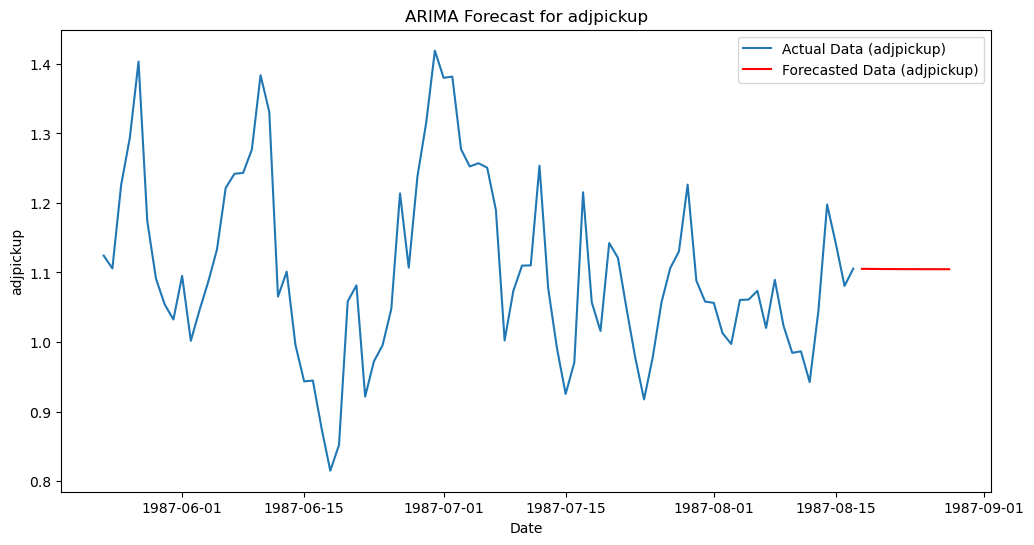

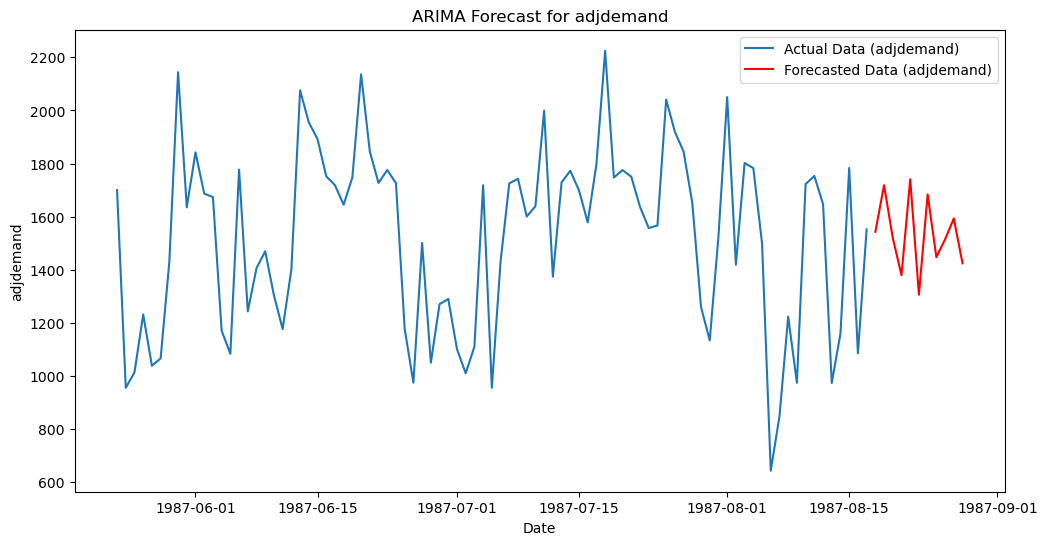

In [134]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Read the data from your Excel file
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
data = pd.read_excel(file_path, sheet_name='fd')

# Assuming you have columns named 'date', 'adjpickup', and 'adjdemand'

# Forecasting 'adjpickup'
pickup_data = data[['date', 'adjpickup']]
pickup_data['date'] = pd.to_datetime(pickup_data['date'])
pickup_data.set_index('date', inplace=True)

# Create and fit ARIMA model
order_pickup = (1, 0, 0)  # Replace with your appropriate order
model_pickup = sm.tsa.ARIMA(pickup_data, order=order_pickup)
results_pickup = model_pickup.fit()

# Forecast the next 11 steps
forecast_steps = 11
forecast_pickup = results_pickup.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(pickup_data, label='Actual Data (adjpickup)')
plt.plot(forecast_pickup, label='Forecasted Data (adjpickup)', color='red')
plt.xlabel('Date')
plt.ylabel('adjpickup')
plt.legend()
plt.title('ARIMA Forecast for adjpickup')
plt.show()

# Forecasting 'adjdemand'
demand_data = data[['date', 'adjdemand']]
demand_data['date'] = pd.to_datetime(demand_data['date'])
demand_data.set_index('date', inplace=True)

# Create and fit ARIMA model
order_demand = (2, 1, 4)  # Replace with your appropriate order
model_demand = sm.tsa.ARIMA(demand_data, order=order_demand)
results_demand = model_demand.fit()

# Forecast the next 11 steps
forecast_demand = results_demand.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(demand_data, label='Actual Data (adjdemand)')
plt.plot(forecast_demand, label='Forecasted Data (adjdemand)', color='red')
plt.xlabel('Date')
plt.ylabel('adjdemand')
plt.legend()
plt.title('ARIMA Forecast for adjdemand')
plt.show()


In [135]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Read the data from your Excel file
file_path = "/Users/khizarbilal/Desktop/mmm.xlsx"
data = pd.read_excel(file_path, sheet_name='fd')

# Assuming you have columns named 'date', 'adjpickup', and 'adjdemand'

# Forecasting 'adjpickup'
pickup_data = data['adjpickup']

# Create and fit ARIMA model
order_pickup = (1, 0, 0)  # Replace with your appropriate order
model_pickup = sm.tsa.ARIMA(pickup_data, order=order_pickup)
results_pickup = model_pickup.fit()

# Forecast the next 11 steps
forecast_steps = 11
forecast_pickup = results_pickup.forecast(steps=forecast_steps)

# Forecasting 'adjdemand'
demand_data = data['adjdemand']

# Create and fit ARIMA model
order_demand = (2, 1, 4)  # Replace with your appropriate order
model_demand = sm.tsa.ARIMA(demand_data, order=order_demand)
results_demand = model_demand.fit()

# Forecast the next 11 steps
forecast_demand = results_demand.forecast(steps=forecast_steps)

# Print the numerical forecast values for both columns
print("Forecasted values for 'adjpickup':")
print(forecast_pickup)

print("Forecasted values for 'adjdemand':")
print(forecast_demand)


Forecasted values for 'adjpickup':
87    1.105262
88    1.105104
89    1.104985
90    1.104897
91    1.104832
92    1.104783
93    1.104747
94    1.104720
95    1.104700
96    1.104685
97    1.104673
Name: predicted_mean, dtype: float64
Forecasted values for 'adjdemand':
87    1542.886984
88    1718.390888
89    1519.709698
90    1379.506990
91    1740.544740
92    1305.752137
93    1683.438047
94    1447.363498
95    1514.502924
96    1593.098096
97    1424.295485
Name: predicted_mean, dtype: float64


In [137]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)


In [138]:
data = data.set_index('date').sort_index()
data_insample = data['2021-04-04':'2023-02-26']
data_insample.tail()

,tencent,dhp
date,,
2023-01-29,37.860,3.380482
2023-02-05,35.993,-4.931326
2023-02-12,34.736,-3.492346
2023-02-19,34.527,-0.601681
2023-02-26,35.289,2.206968


In [139]:
model = smt.ARIMA(data_insample['dhp'], order=(1,0,2))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dhp   No. Observations:                   99
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -286.530
Date:                Fri, 20 Oct 2023   AIC                            583.059
Time:                        08:51:08   BIC                            596.035
Sample:                    04-11-2021   HQIC                           588.309
                         - 02-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2032      0.364      0.559      0.576      -0.509       0.916
ar.L1          0.5281      0.370      1.427      0.154      -0.197       1.254
ma.L1         -0.4191      0.366     -1.145      0.2

In [140]:
model = smt.ARIMA(data_insample['dhp'], order=(0,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dhp   No. Observations:                   99
Model:                          ARIMA   Log Likelihood                -289.105
Date:                Fri, 20 Oct 2023   AIC                            582.211
Time:                        08:51:23   BIC                            587.401
Sample:                    04-11-2021   HQIC                           584.311
                         - 02-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1920      0.471      0.407      0.684      -0.732       1.116
sigma2        20.1385      2.240      8.989      0.000      15.748      24.529
Ljung-Box (L1) (Q):                   1.28   Jarque-

In [141]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

# Create a function to generate forecasts and return them in a table
def generate_forecasts(data, order):
    # Assuming you have a 'date' column, set it as the index
    data = data.set_index('date').sort_index()
    data_insample = data['2021-04-04':'2023-02-26']
    
    # Create and fit ARIMA model
    model = sm.tsa.ARIMA(data_insample, order=order)
    results = model.fit()

    # Generate forecasts for 50 steps
    forecast_steps = 50
    forecasts = results.forecast(steps=forecast_steps)
    
    # Create a DataFrame with the forecasts
    forecast_df = pd.DataFrame({'Forecast': forecasts}, index=pd.date_range(start='2023-02-27', periods=forecast_steps, freq='D'))
    
    return forecast_df

# Define the ARIMA orders you want to test
orders = [(1, 0, 2), (0, 0, 0)]

# Iterate through each ARIMA order and generate forecasts
for order in orders:
    order_str = f'ARIMA{order[0]}-{order[1]}-{order[2]}'
    forecasts = generate_forecasts(data, order)
    
    # Print the forecasts for this order
    print(f"Forecasts for {order_str}:")
    print(forecasts)


Forecasts for ARIMA1-0-2:
             Forecast
2023-02-27        NaN
2023-02-28        NaN
2023-03-01        NaN
2023-03-02        NaN
2023-03-03        NaN
2023-03-04        NaN
2023-03-05  34.979343
2023-03-06        NaN
2023-03-07        NaN
2023-03-08        NaN
2023-03-09        NaN
2023-03-10        NaN
2023-03-11        NaN
2023-03-12  34.486360
2023-03-13        NaN
2023-03-14        NaN
2023-03-15        NaN
2023-03-16        NaN
2023-03-17        NaN
2023-03-18        NaN
2023-03-19  34.087168
2023-03-20        NaN
2023-03-21        NaN
2023-03-22        NaN
2023-03-23        NaN
2023-03-24        NaN
2023-03-25        NaN
2023-03-26  33.739271
2023-03-27        NaN
2023-03-28        NaN
2023-03-29        NaN
2023-03-30        NaN
2023-03-31        NaN
2023-04-01        NaN
2023-04-02  33.436076
2023-04-03        NaN
2023-04-04        NaN
2023-04-05        NaN
2023-04-06        NaN
2023-04-07        NaN
2023-04-08        NaN
2023-04-09  33.171841
2023-04-10        NaN
2023-0

In [142]:
import pandas as pd
import statsmodels.api as sm

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

# Create a function to generate weekly forecasts and return them in a table
def generate_weekly_forecasts(data, order):
    # Assuming you have a 'date' column, set it as the index
    data = data.set_index('date').sort_index()
    data_insample = data['2021-04-04':'2023-02-26']
    
    # Create and fit ARIMA model
    model = sm.tsa.ARIMA(data_insample, order=order)
    results = model.fit()

    # Generate weekly forecasts for 50 weeks
    forecast_weeks = 50
    forecasts = results.forecast(steps=forecast_weeks)
    
    # Create a DataFrame with the weekly forecasts
    forecast_df = pd.DataFrame({'Forecast': forecasts}, index=pd.date_range(start='2023-02-27', periods=forecast_weeks, freq='W'))
    
    return forecast_df

# Define the ARIMA orders you want to test
orders = [(1, 0, 2), (0, 0, 0)]

# Iterate through each ARIMA order and generate weekly forecasts
for order in orders:
    order_str = f'ARIMA{order[0]}-{order[1]}-{order[2]}'
    forecasts = generate_weekly_forecasts(data, order)
    
    # Print the forecasts for this order
    print(f"Forecasts for {order_str}:")
    print(forecasts)


Forecasts for ARIMA1-0-2:
             Forecast
2023-03-05  34.979343
2023-03-12  34.486360
2023-03-19  34.087168
2023-03-26  33.739271
2023-04-02  33.436076
2023-04-09  33.171841
2023-04-16  32.941558
2023-04-23  32.740866
2023-04-30  32.565961
2023-05-07  32.413531
2023-05-14  32.280688
2023-05-21  32.164914
2023-05-28  32.064017
2023-06-04  31.976084
2023-06-11  31.899450
2023-06-18  31.832664
2023-06-25  31.774459
2023-07-02  31.723733
2023-07-09  31.679525
2023-07-16  31.640997
2023-07-23  31.607421
2023-07-30  31.578158
2023-08-06  31.552656
2023-08-13  31.530431
2023-08-20  31.511061
2023-08-27  31.494180
2023-09-03  31.479469
2023-09-10  31.466648
2023-09-17  31.455474
2023-09-24  31.445736
2023-10-01  31.437249
2023-10-08  31.429853
2023-10-15  31.423407
2023-10-22  31.417790
2023-10-29  31.412894
2023-11-05  31.408627
2023-11-12  31.404909
2023-11-19  31.401668
2023-11-26  31.398844
2023-12-03  31.396383
2023-12-10  31.394238
2023-12-17  31.392368
2023-12-24  31.390739
2023-1

In [143]:
import pandas as pd
import statsmodels.tsa.api as smt  # Import the statsmodels.tsa.api library
import pickle  # Import the pickle library

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

# Select the first two columns, assuming 'date' and '700' are column names
data = data[['date', 'tencent']]

# Calculate the percentage change for the '700' column and store it in 'dhp'
data['dhp'] = data['tencent'].transform(lambda x: (x - x.shift(1)) / x.shift(1) * 100)

# Remove rows with missing values
data = data.dropna()

# Display the first few rows of the resulting DataFrame
print(data.head())


        date  tencent       dhp
1 2021-04-11   31.891 -0.941169
2 2021-04-18   31.917  0.081528
3 2021-04-25   32.185  0.839678
4 2021-05-02   31.709 -1.478950
5 2021-05-09   32.107  1.255164


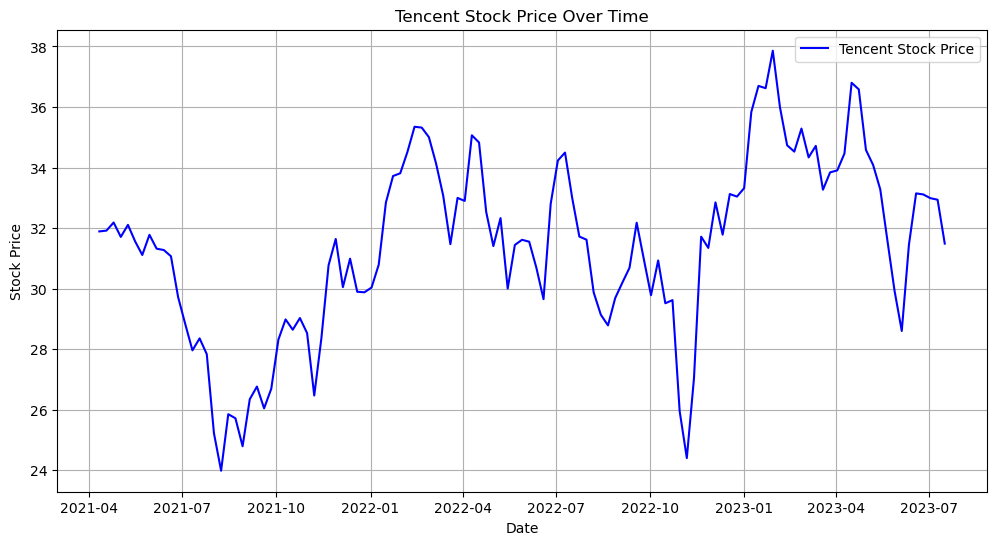

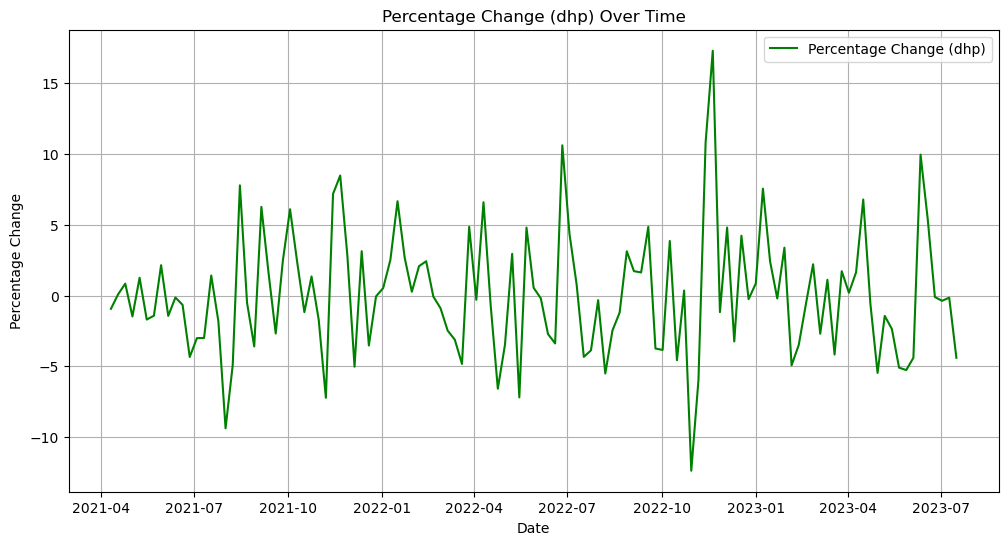

In [144]:
import matplotlib.pyplot as plt

# Create a line plot for the 'tencent' column
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['tencent'], label='Tencent Stock Price', color='blue')
plt.title('Tencent Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Display the 'dhp' plot as a subplot
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['dhp'], label='Percentage Change (dhp)', color='green')
plt.title('Percentage Change (dhp) Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)

plt.show()


In [145]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/khizarbilal/Desktop/mscibic.xlsx"

# Read the Excel file and specify the sheet name
data = pd.read_excel(file_path, sheet_name='A2')

with open(file_path + 'mscibic.pickle', 'rb') as handle:
    data = pickle.load(handle)


In [146]:
data = data.set_index('date').sort_index()
data_insample = data['2021-04-04':'2023-02-26']
data_insample.tail()

,tencent,dhp
date,,
2023-01-29,37.860,3.380482
2023-02-05,35.993,-4.931326
2023-02-12,34.736,-3.492346
2023-02-19,34.527,-0.601681
2023-02-26,35.289,2.206968


In [147]:
model = smt.ARIMA(data_insample['dhp'], order=(1,0,2))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dhp   No. Observations:                   99
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -286.530
Date:                Fri, 20 Oct 2023   AIC                            583.059
Time:                        15:16:49   BIC                            596.035
Sample:                    04-11-2021   HQIC                           588.309
                         - 02-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2032      0.364      0.559      0.576      -0.509       0.916
ar.L1          0.5281      0.370      1.427      0.154      -0.197       1.254
ma.L1         -0.4191      0.366     -1.145      0.2

In [148]:
model = smt.ARIMA(data_insample['dhp'], order=(0,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dhp   No. Observations:                   99
Model:                          ARIMA   Log Likelihood                -289.105
Date:                Fri, 20 Oct 2023   AIC                            582.211
Time:                        15:17:01   BIC                            587.401
Sample:                    04-11-2021   HQIC                           584.311
                         - 02-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1920      0.471      0.407      0.684      -0.732       1.116
sigma2        20.1385      2.240      8.989      0.000      15.748      24.529
Ljung-Box (L1) (Q):                   1.28   Jarque-